In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import nibabel as nib 
import os 
from glob import glob 
import scipy.ndimage as nd 
import seaborn as sns

In [3]:
#Loading the dataset
path = 'C:\\Users\\aryan\\OneDrive\\Desktop\\Hypocampal Volume Quantification of Alzheimers'
images = glob(os.path.join(path, 'unzipped_img', '*nii'))
labels = glob(os.path.join(path, 'unzipped_labels', '*nii'))

#Depiction of first image with size and shape
image = nib.load(path+'\\unzipped_img\\hippocampus_001.nii').get_fdata()
label = nib.load(path+'\\unzipped_labels\\hippocampus_001.nii').get_fdata()
print('image_01: ', image.shape, label.shape)

image_25 = nib.load(path+'\\unzipped_img\\hippocampus_025.nii').get_fdata()
label_25 = nib.load(path+'\\unzipped_labels\\hippocampus_025.nii').get_fdata()
print('image_25: ', image_25.shape, label_25.shape)

#Depiction of last image with size and shape
image_394 = nib.load(path+'\\unzipped_img\\hippocampus_394.nii').get_fdata()
label_394 = nib.load(path+'\\unzipped_labels\\hippocampus_394.nii').get_fdata()
print('image_394: ', image_394.shape, label_394.shape)

image_01:  (35, 51, 35) (35, 51, 35)
image_25:  (35, 48, 35) (35, 48, 35)
image_394:  (36, 52, 32) (36, 52, 32)


Volume Rendering Algorithm: 

Used in computer graphics and scientific visualization to create a 2D projection from a discretely simple 3D dataset. It is used to convey more information than surface-rendered images. It is also used to visualize complex 3D datasets. It can be used to create interactive visualizations.

Steps Involved:
1. Assigning color and opacity to each sample in a 3D input array.
2. Projecting samples onto an image plane.
3. Blending the projected images.

In [4]:
def volume_slices(image, w, h):
    plot_width = w
    plot_height = h

    fig, ax = plt.subplots(plot_height, plot_width, figsize=[35,35])

    for i in range(plot_width * plot_height):
        plt_x = i % plot_width
        plt_y = i // plot_width
        if (i < len(image)):
            ax[plt_y, plt_x].set_title(f"slice {i}")
            ax[plt_y, plt_x].imshow(image[i], cmap='gray')
        ax[plt_y, plt_x].axis("off")
    
    plt.show()

IMAGE 001 : SAGITAL PLANE

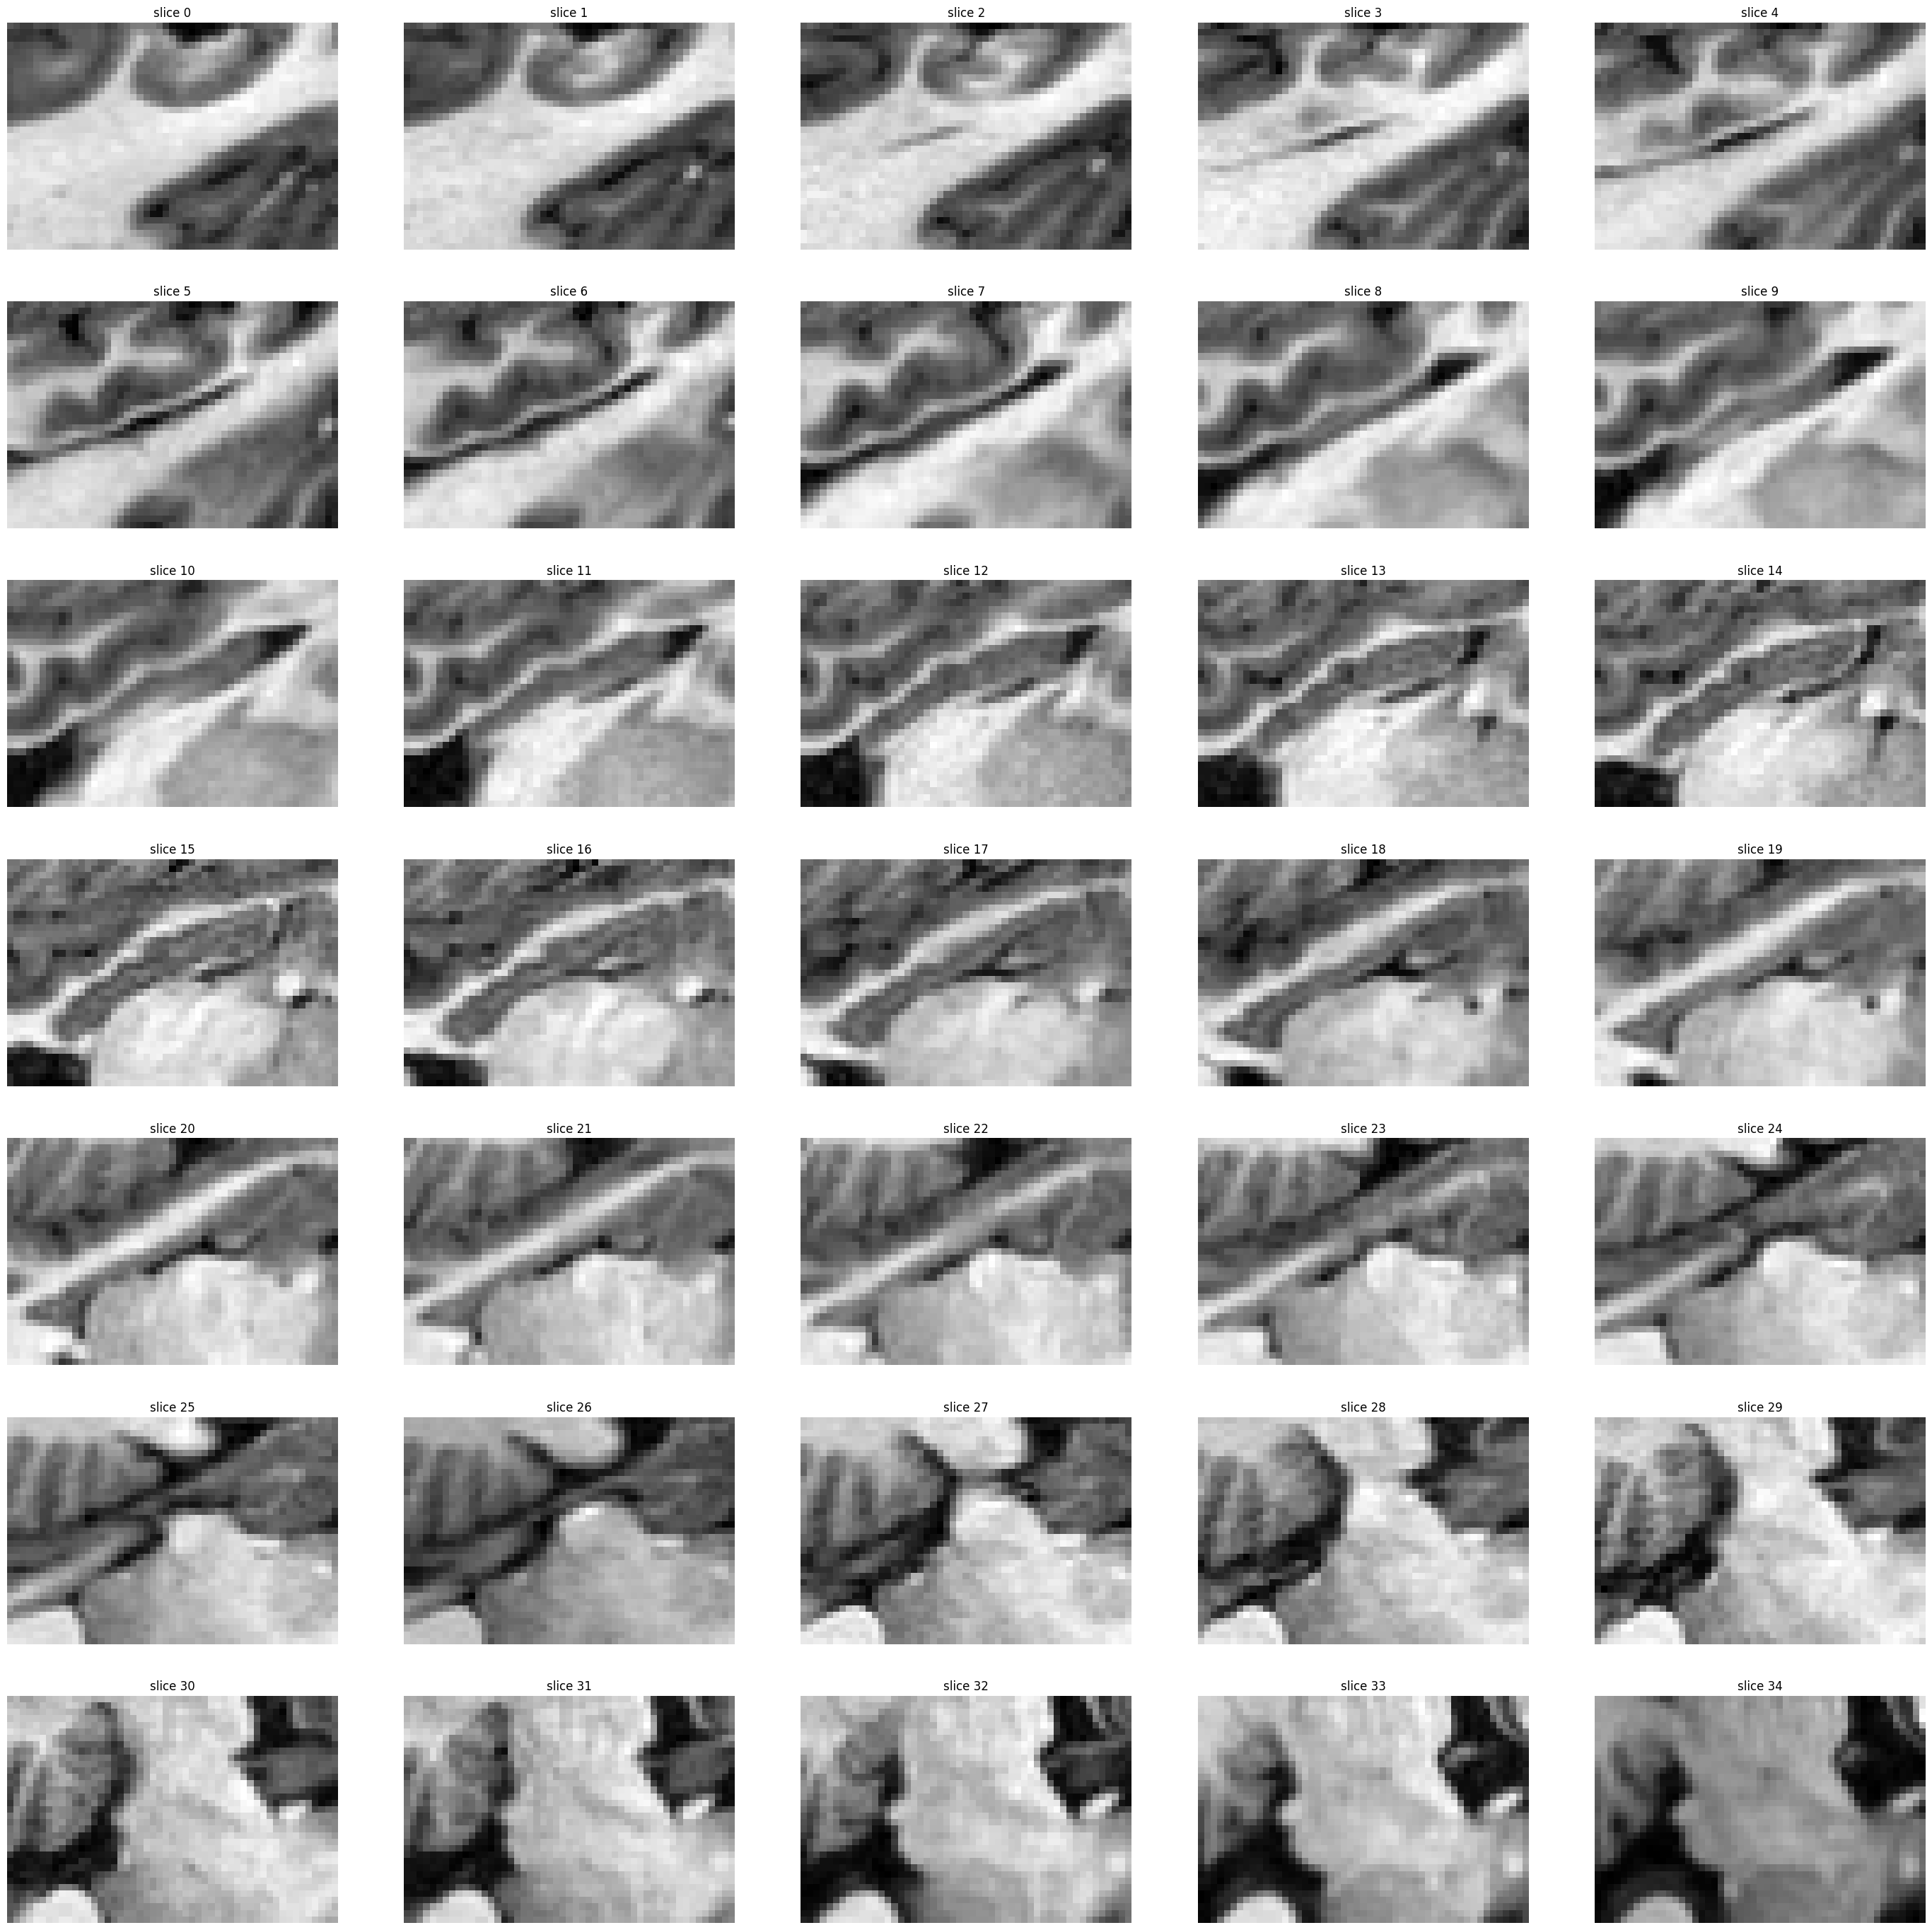

In [5]:
volume_slices(np.transpose(image,(0,2,1)),5,7)

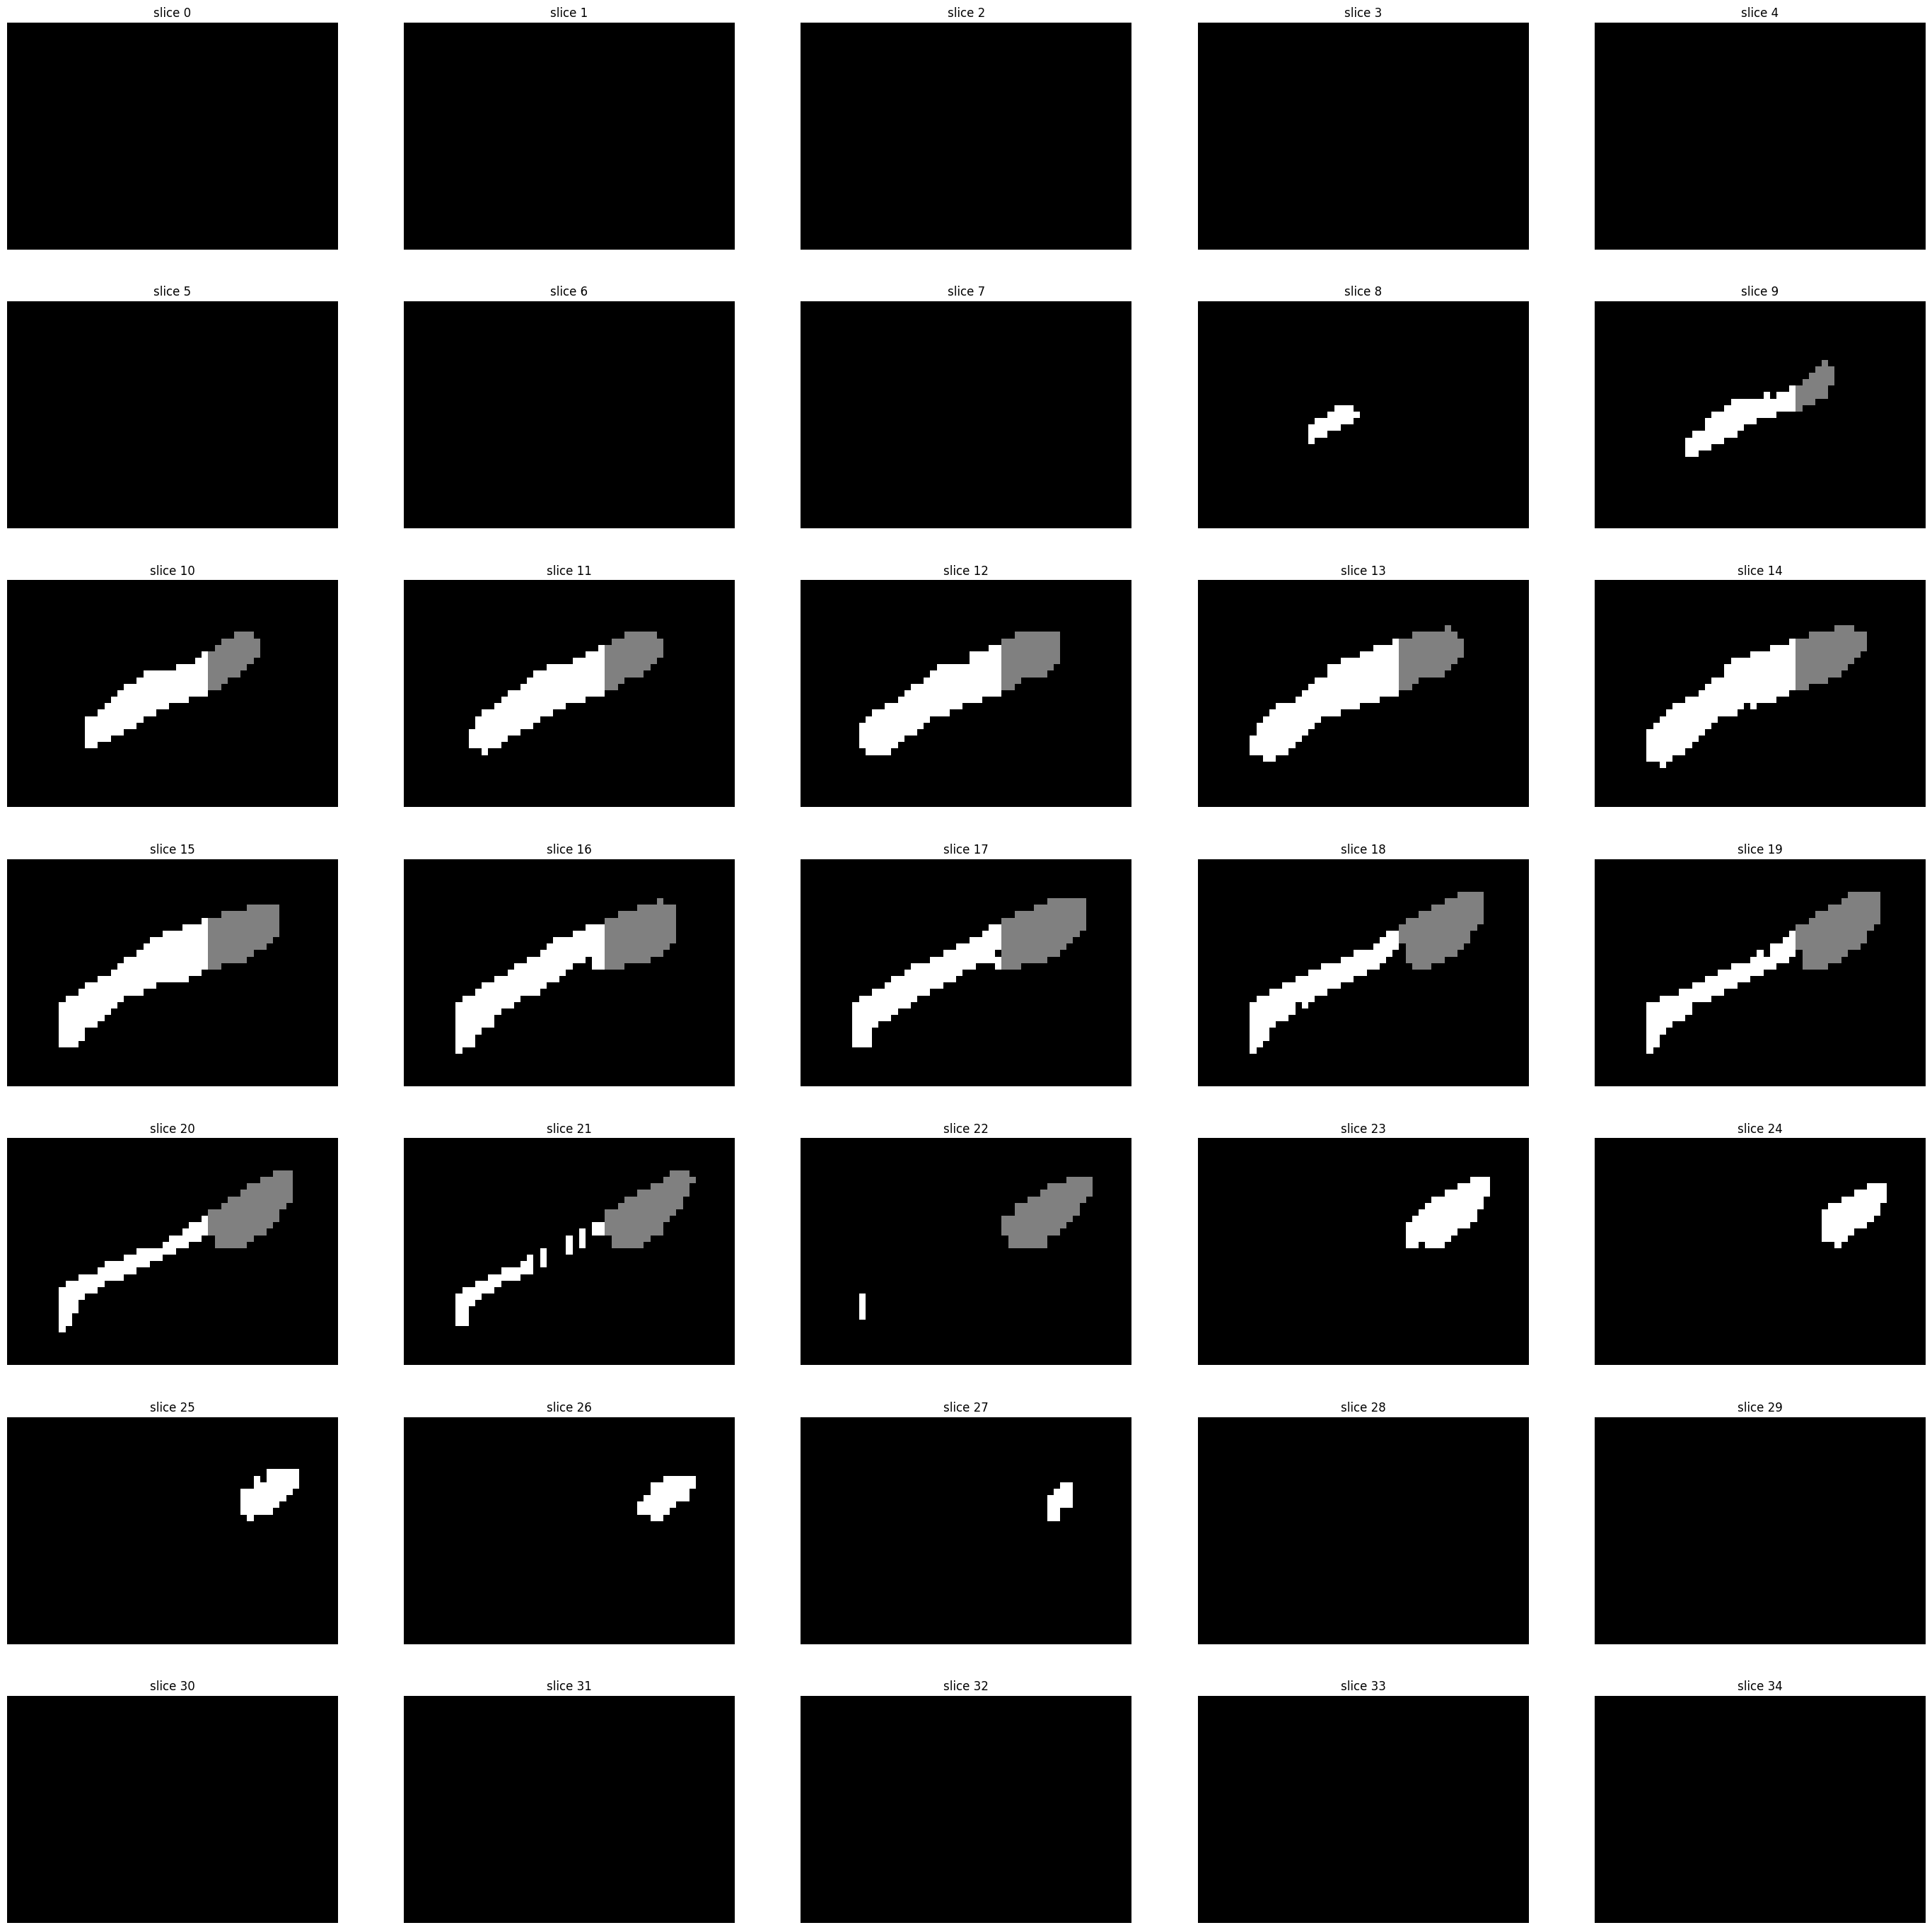

In [6]:
volume_slices(np.transpose(label,(0,2,1)),5,7)


IMAGE 001 : CORONAL PLANE


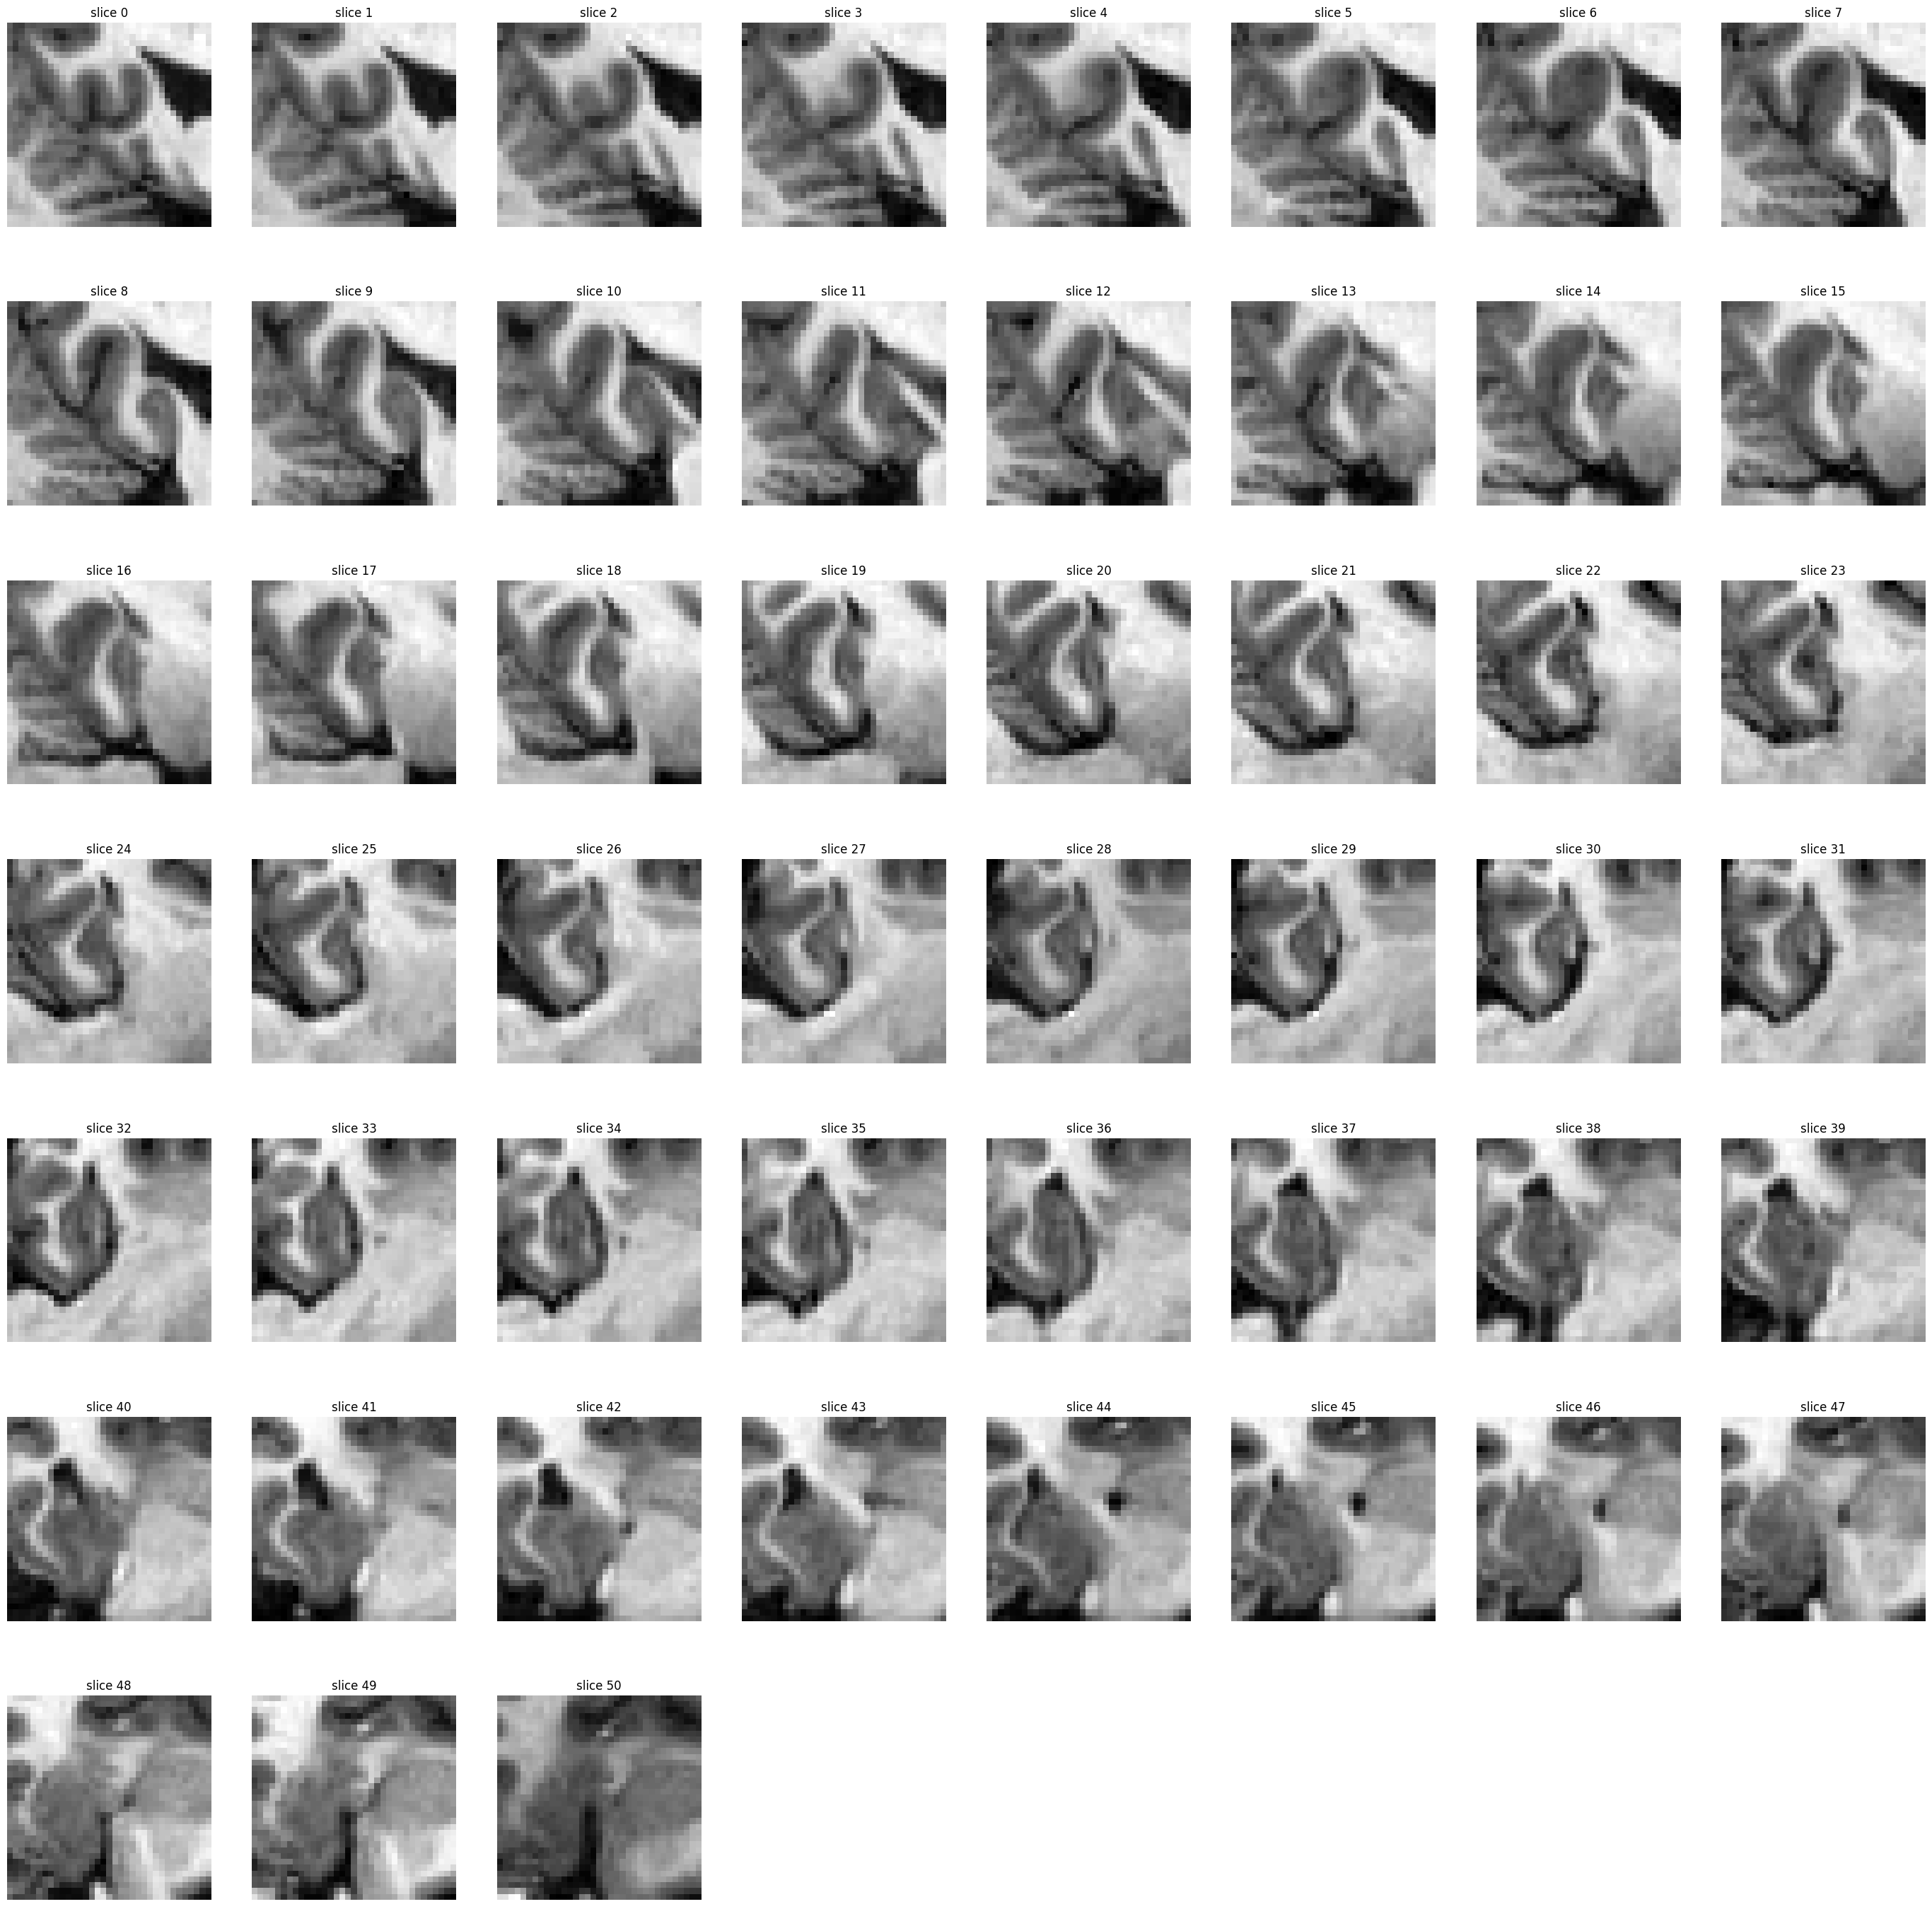

In [7]:
volume_slices(np.transpose(image,(1,0,2)),8,7)

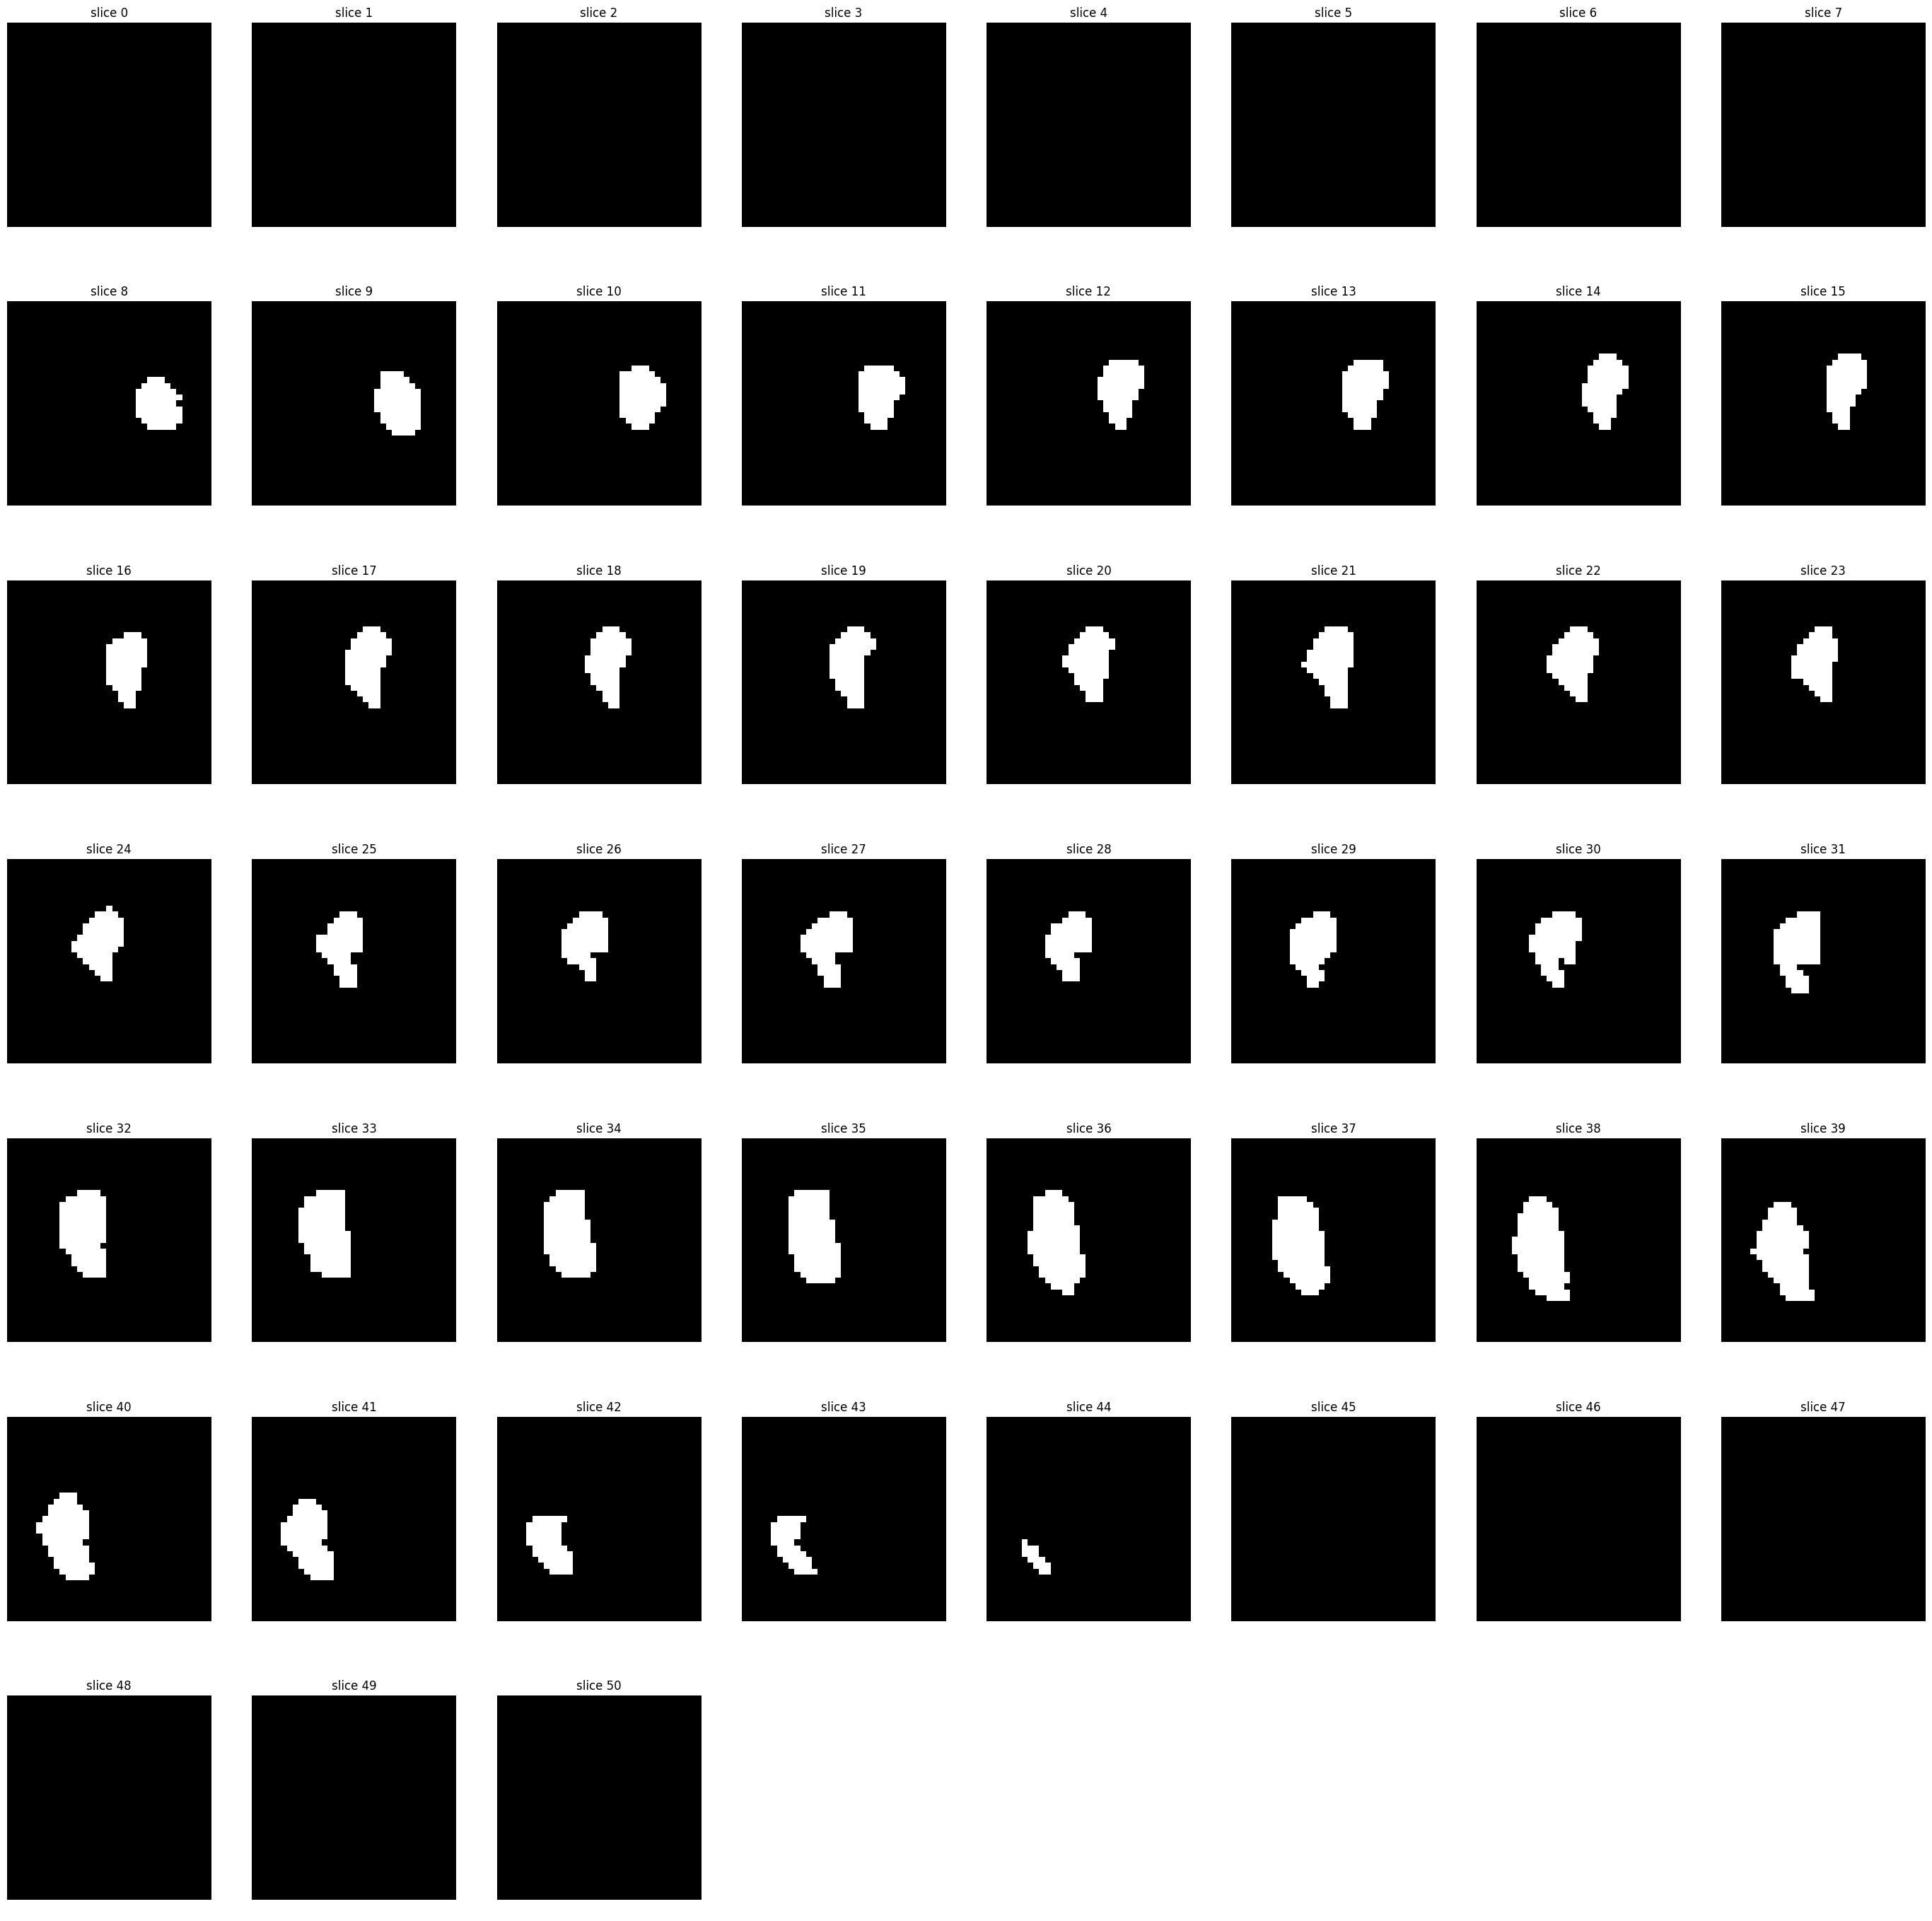

In [8]:
volume_slices(np.transpose(label,(1,0,2)),8,7)

IMAGE 001: AXIAL PLANE

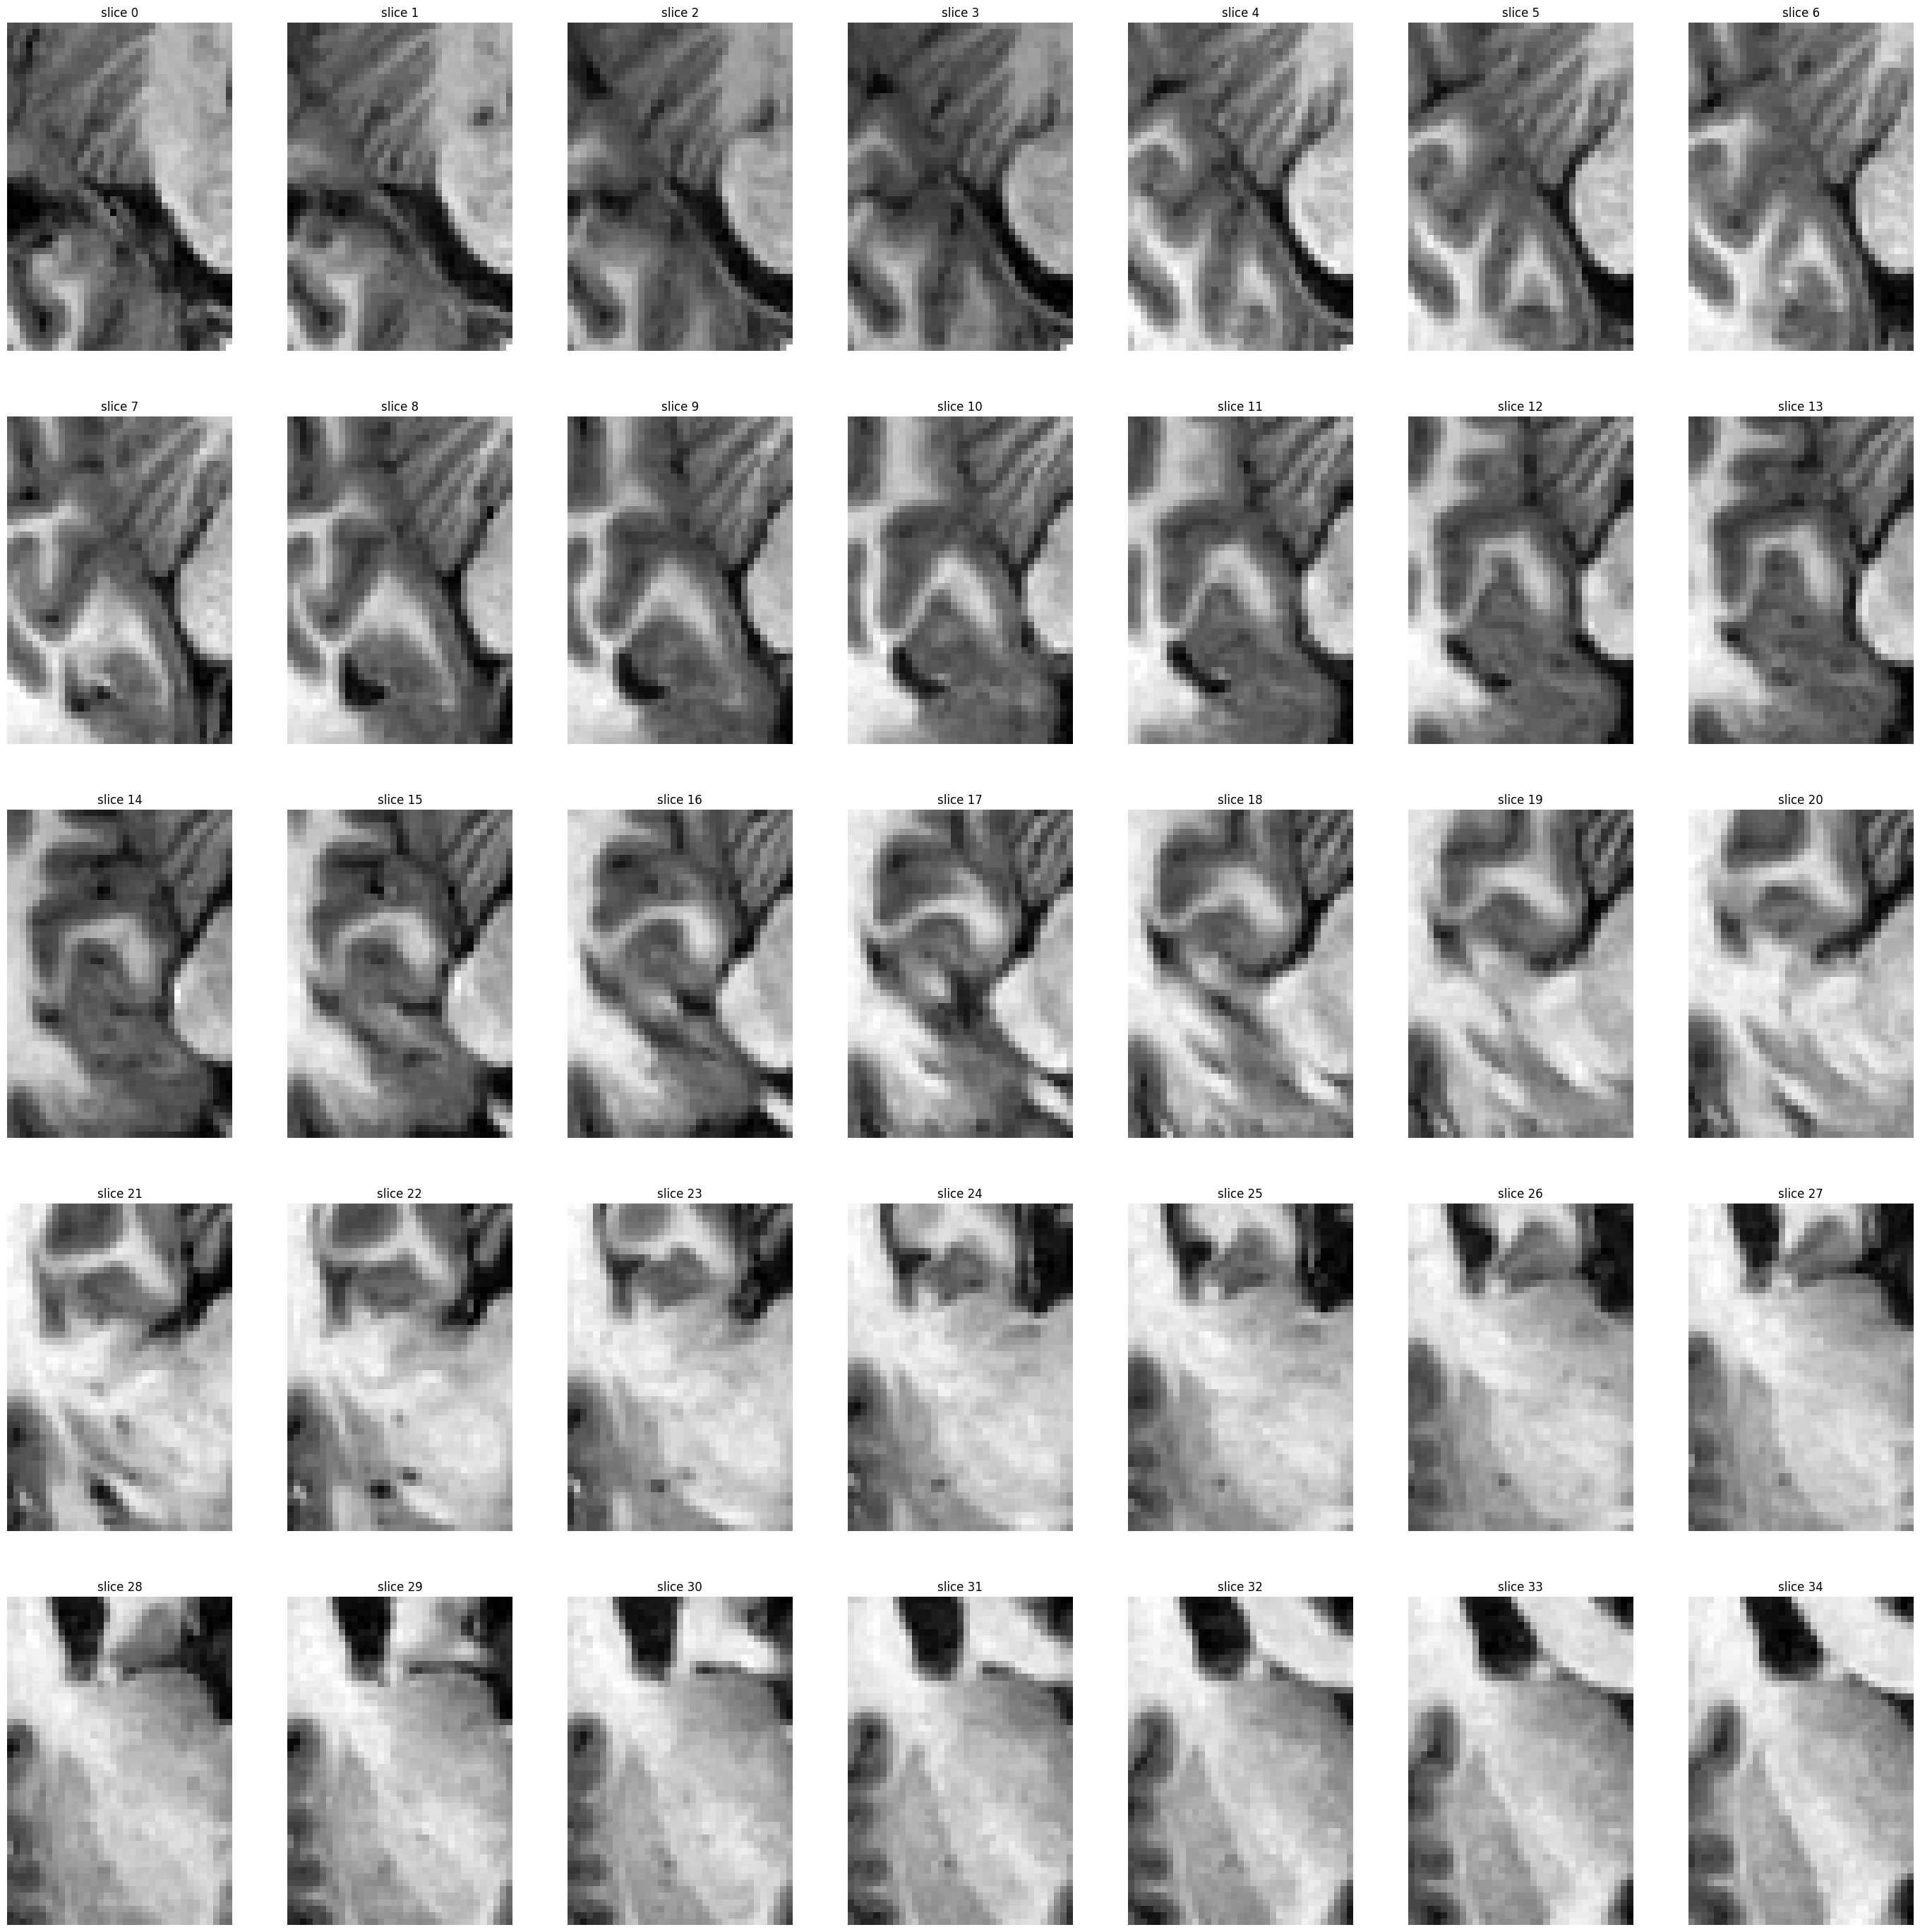

In [9]:
volume_slices(np.transpose(image,(2,1,0)),7,5)

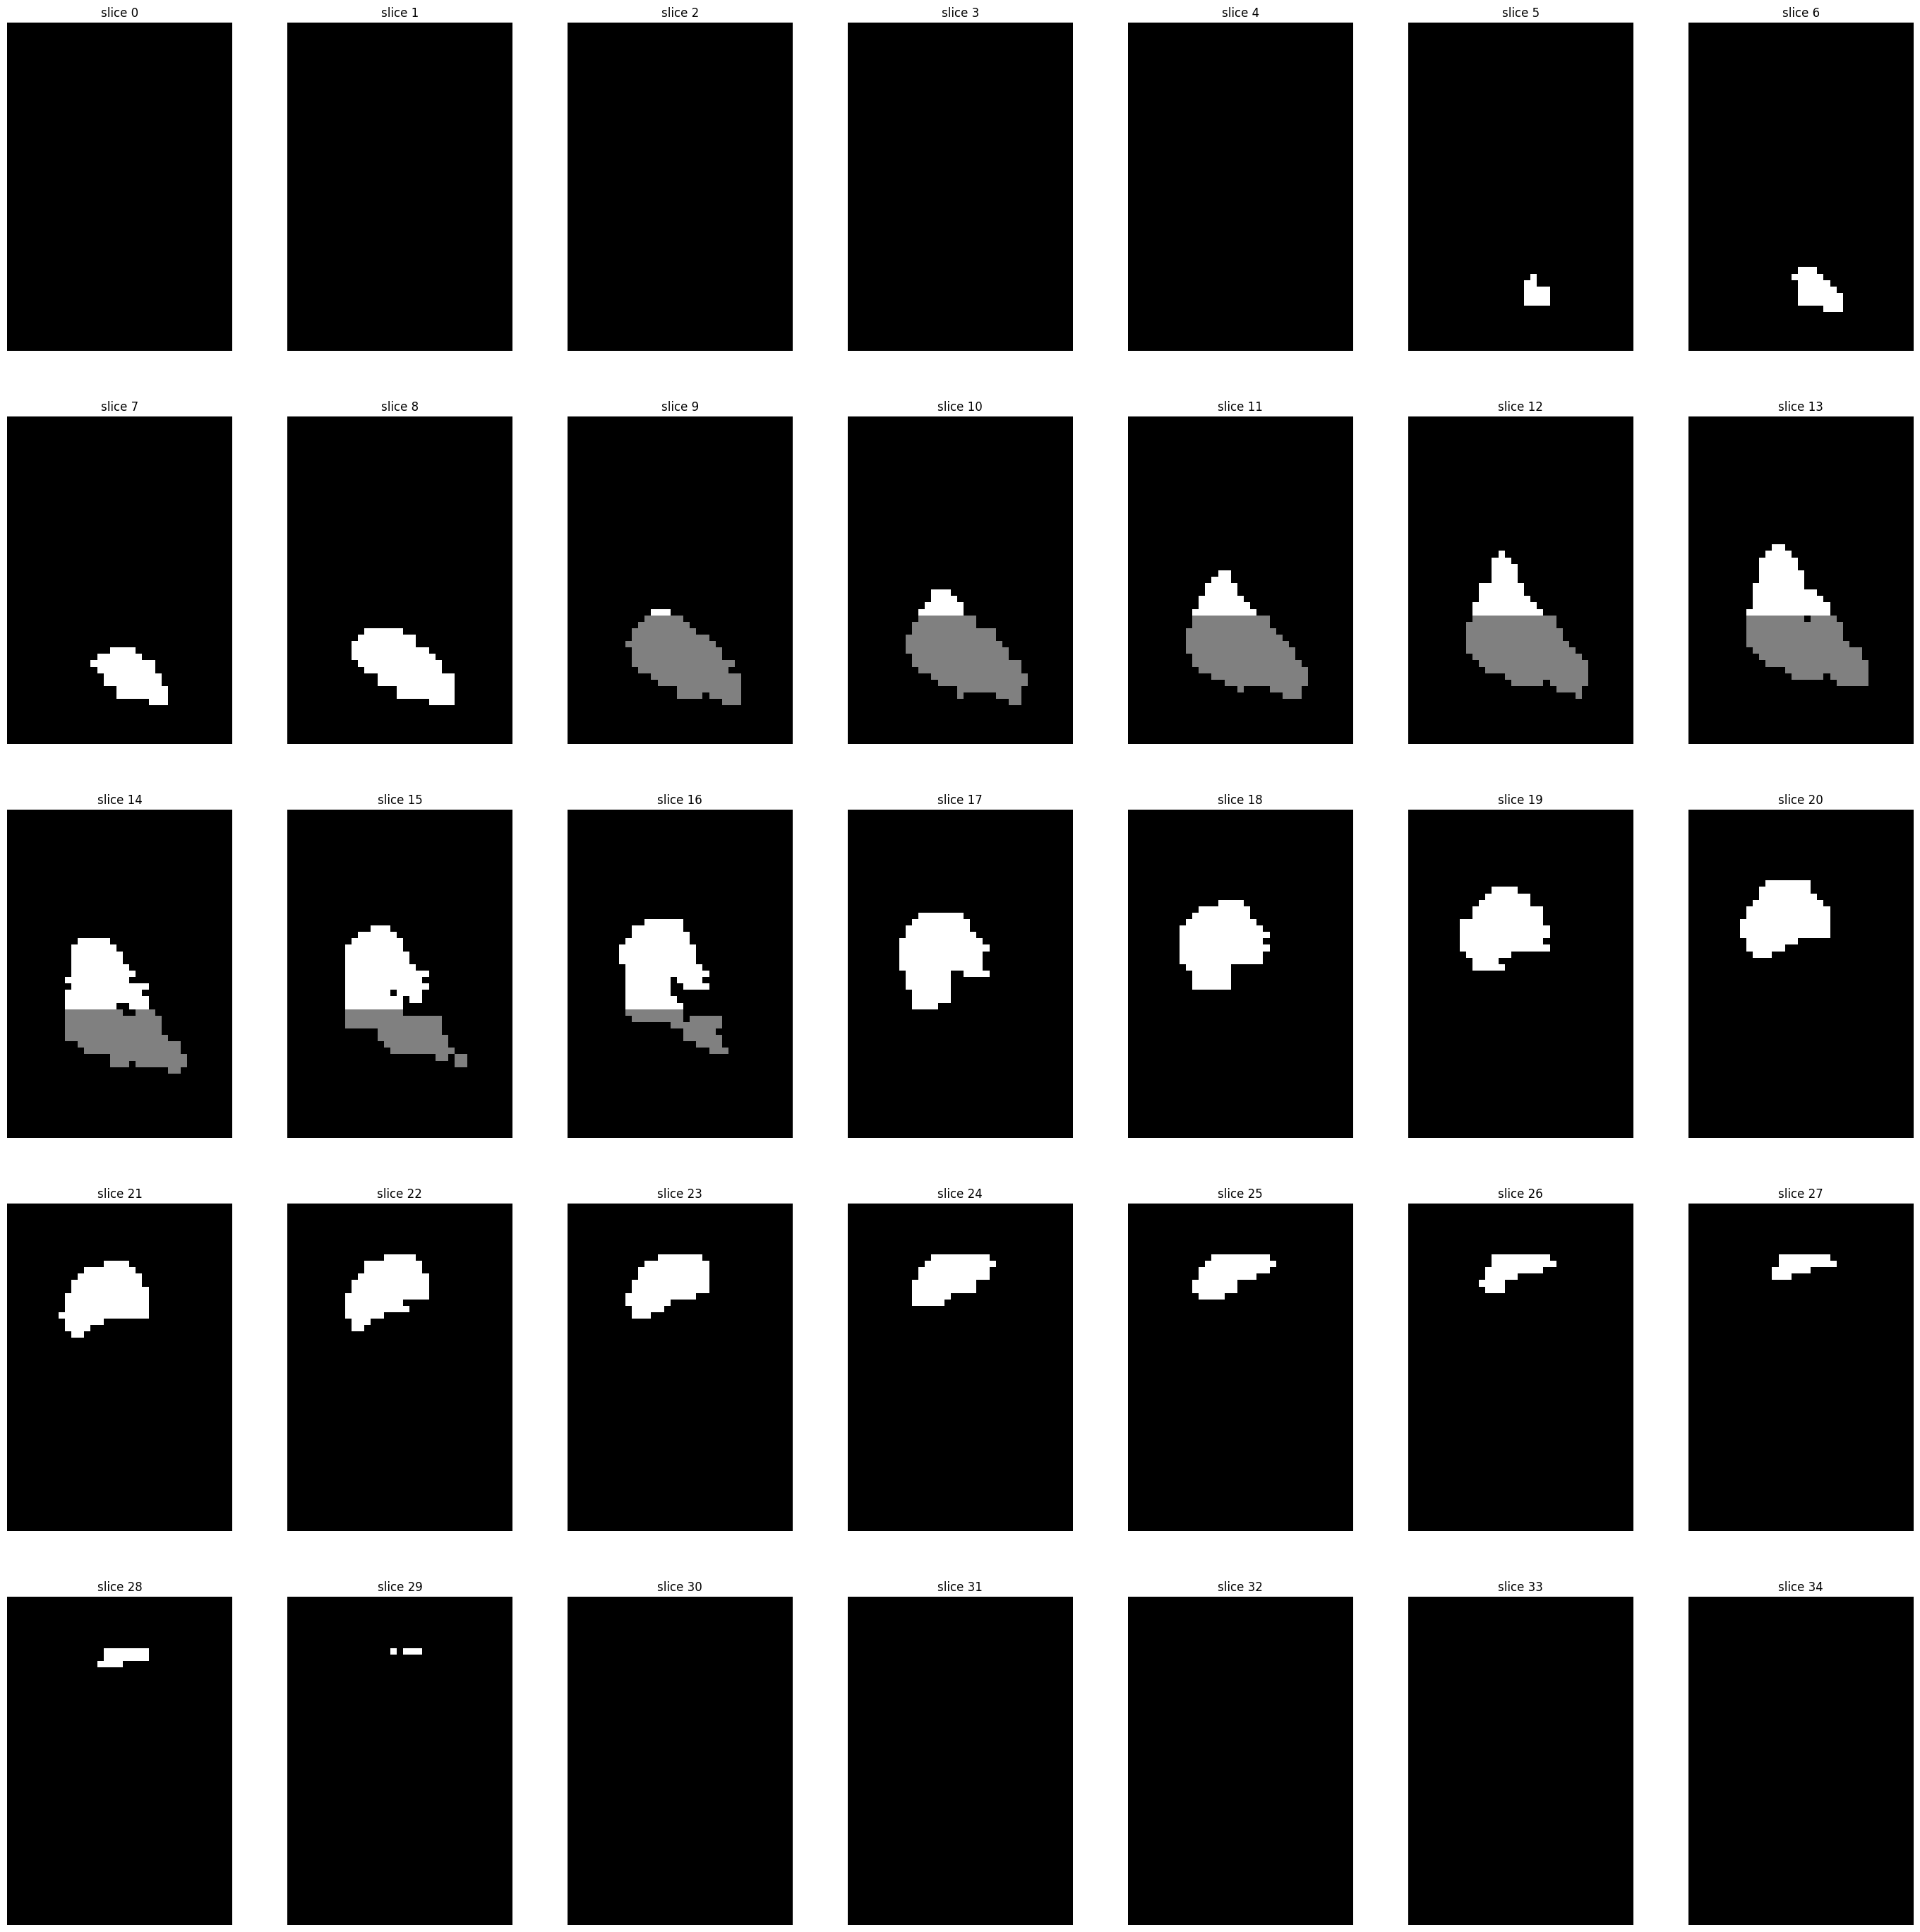

In [10]:
volume_slices(np.transpose(label,(2,1,0)),7,5)

IMAGE 25: SAGITTAL

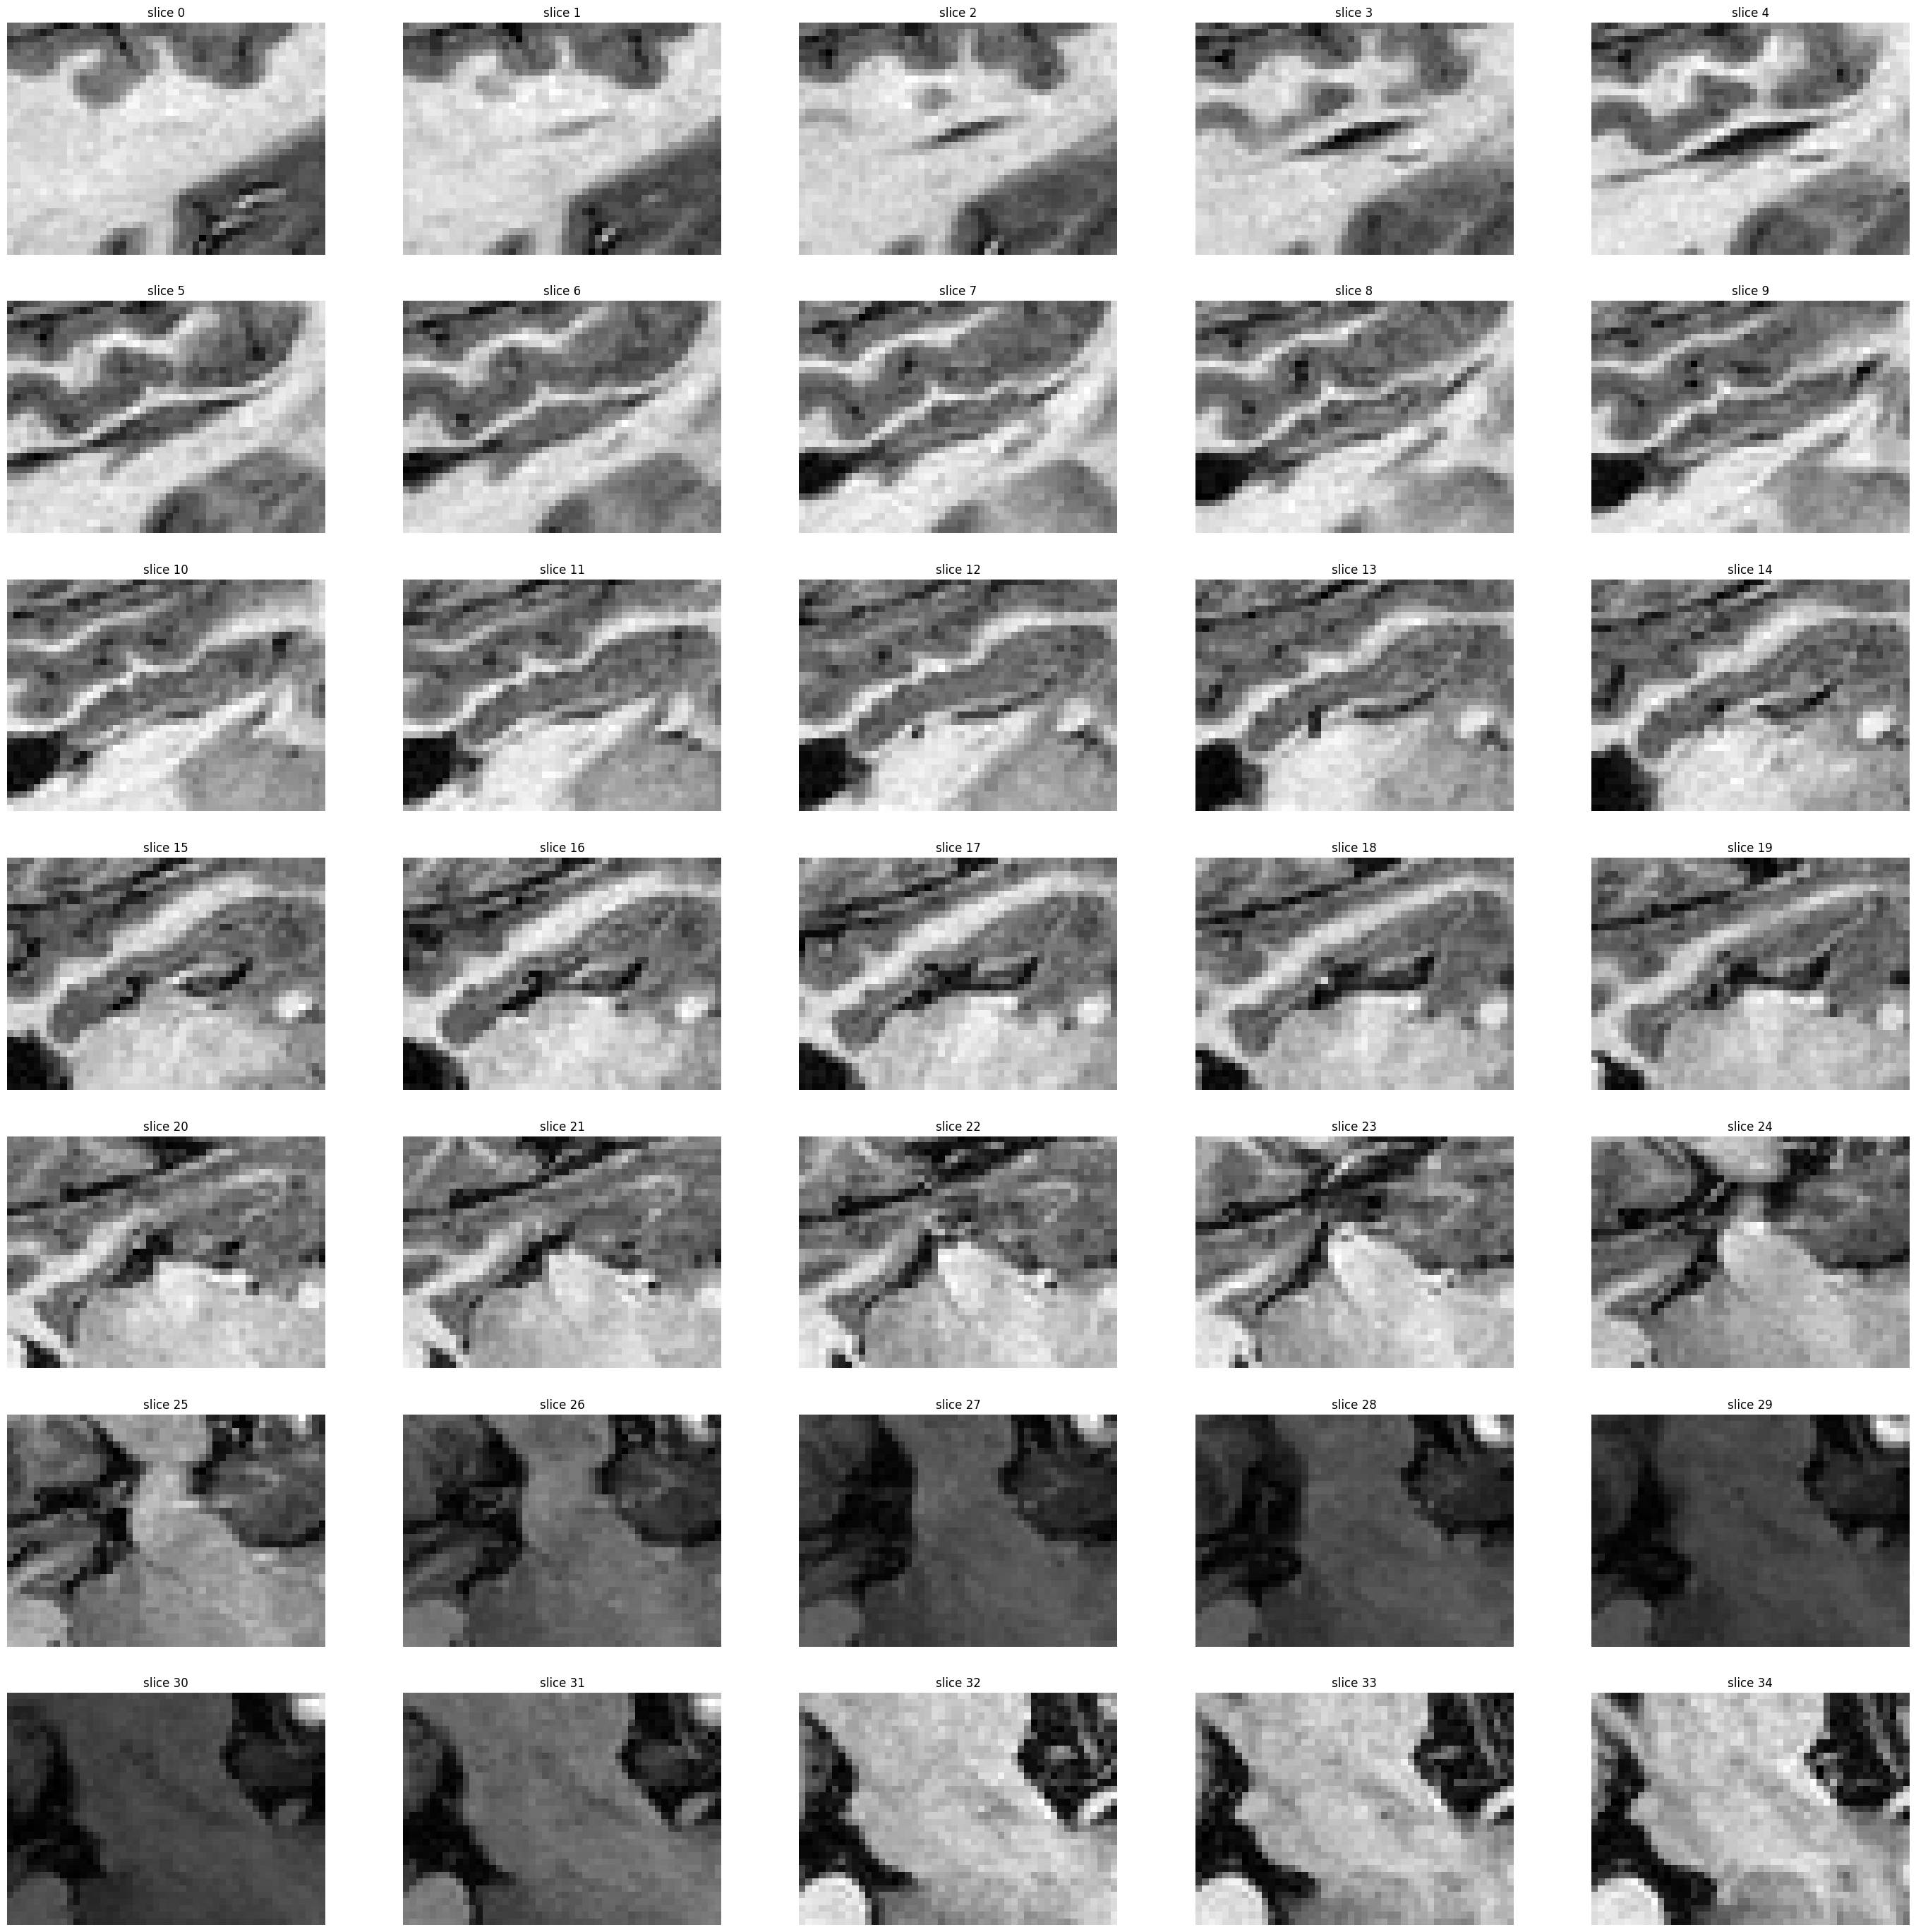

In [11]:
volume_slices(np.transpose(image_25,(0,2,1)),5,7)


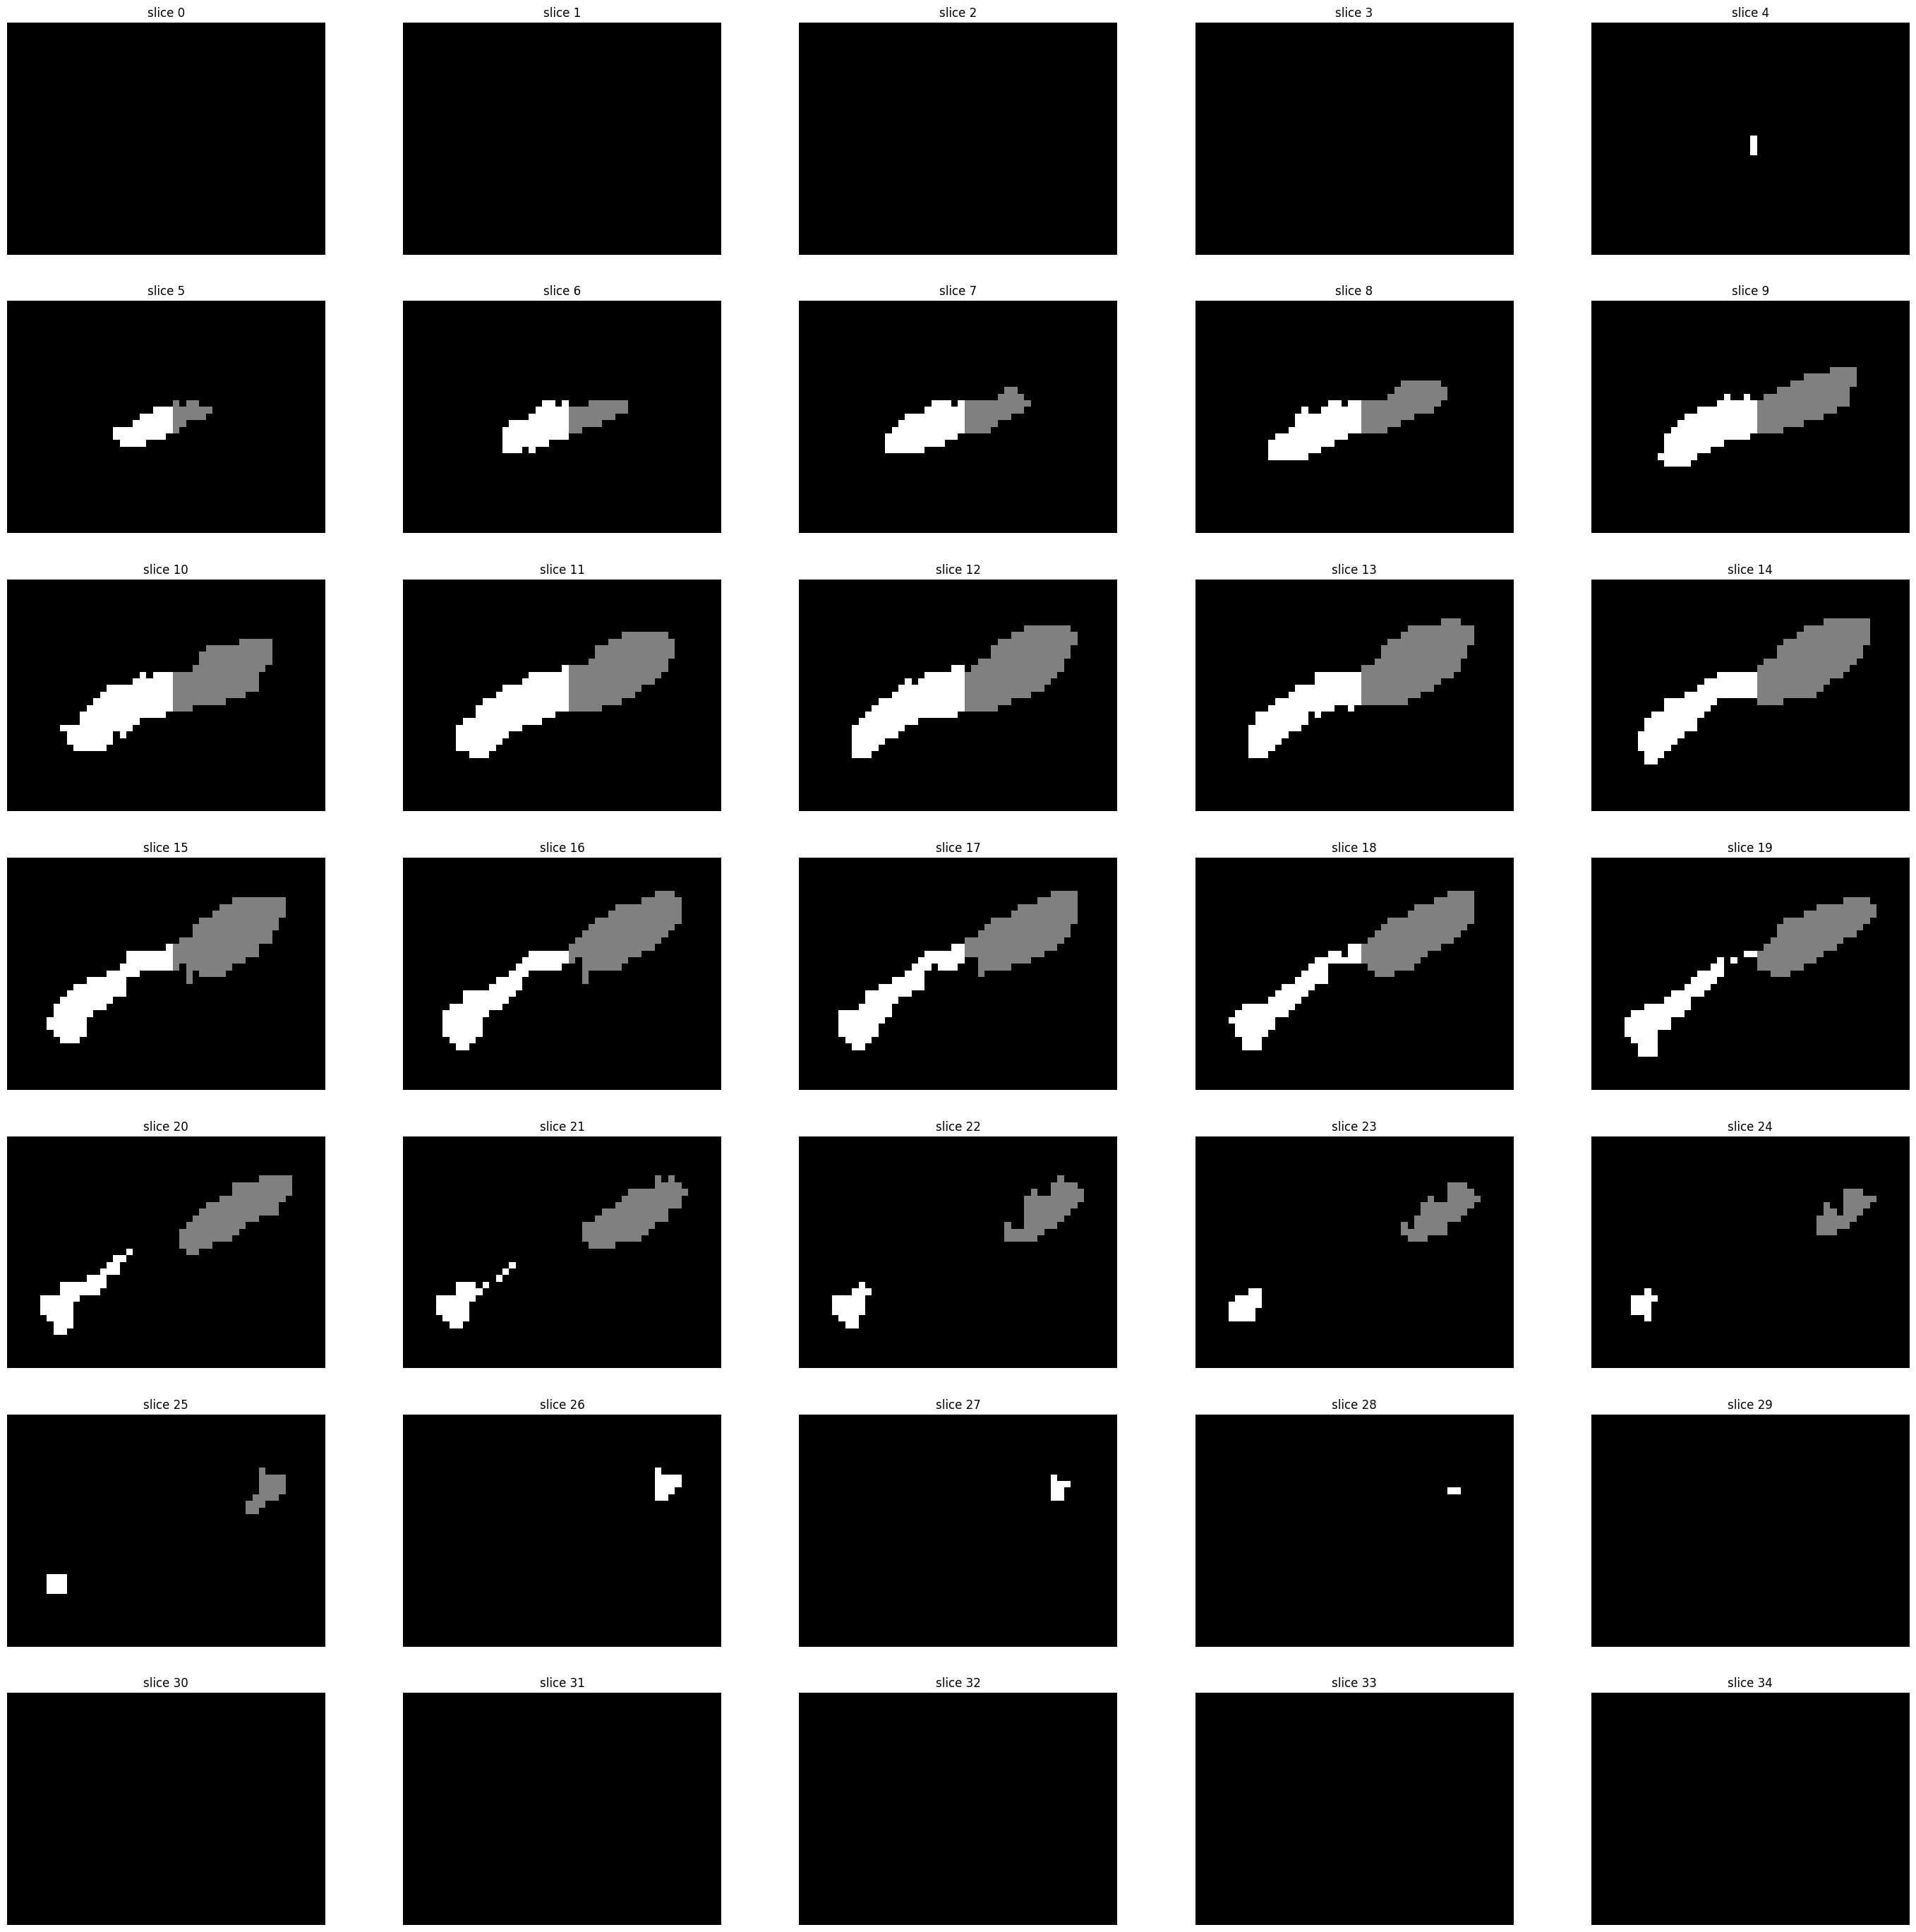

In [12]:
volume_slices(np.transpose(label_25,(0,2,1)),5,7)


IMAGE 25: CORONAL

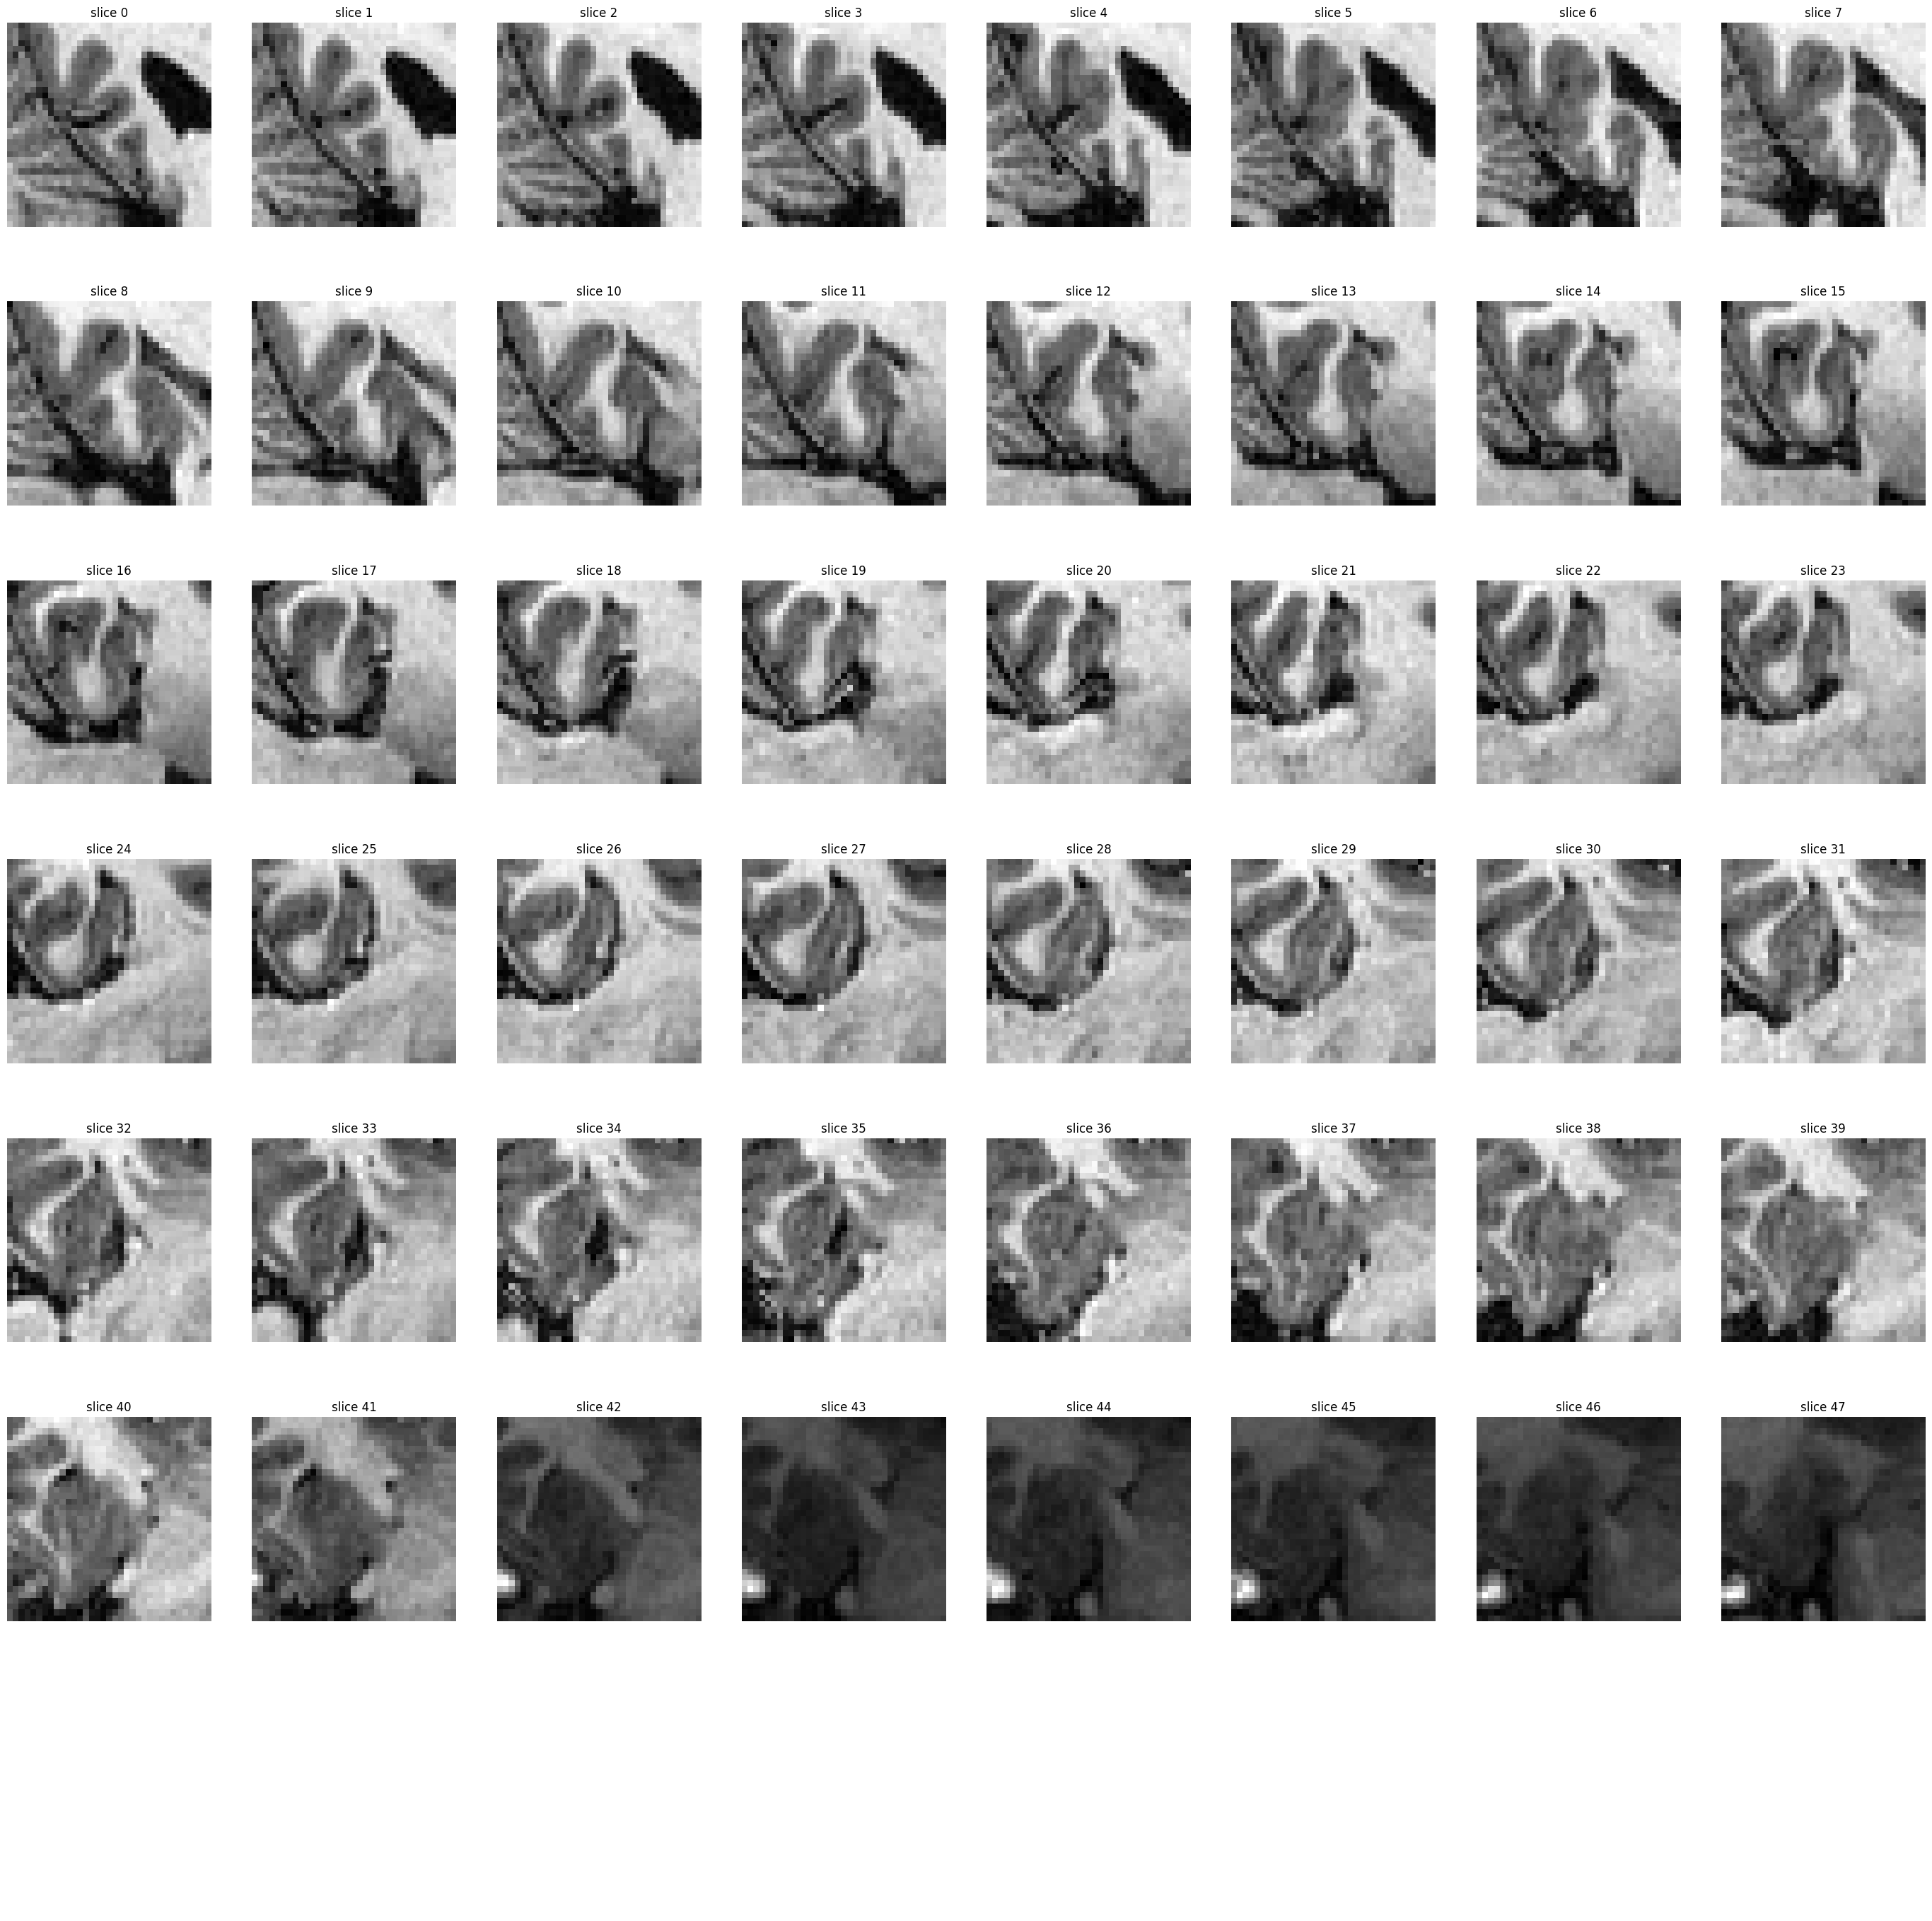

In [13]:
volume_slices(np.transpose(image_25,(1,0,2)),8,7)


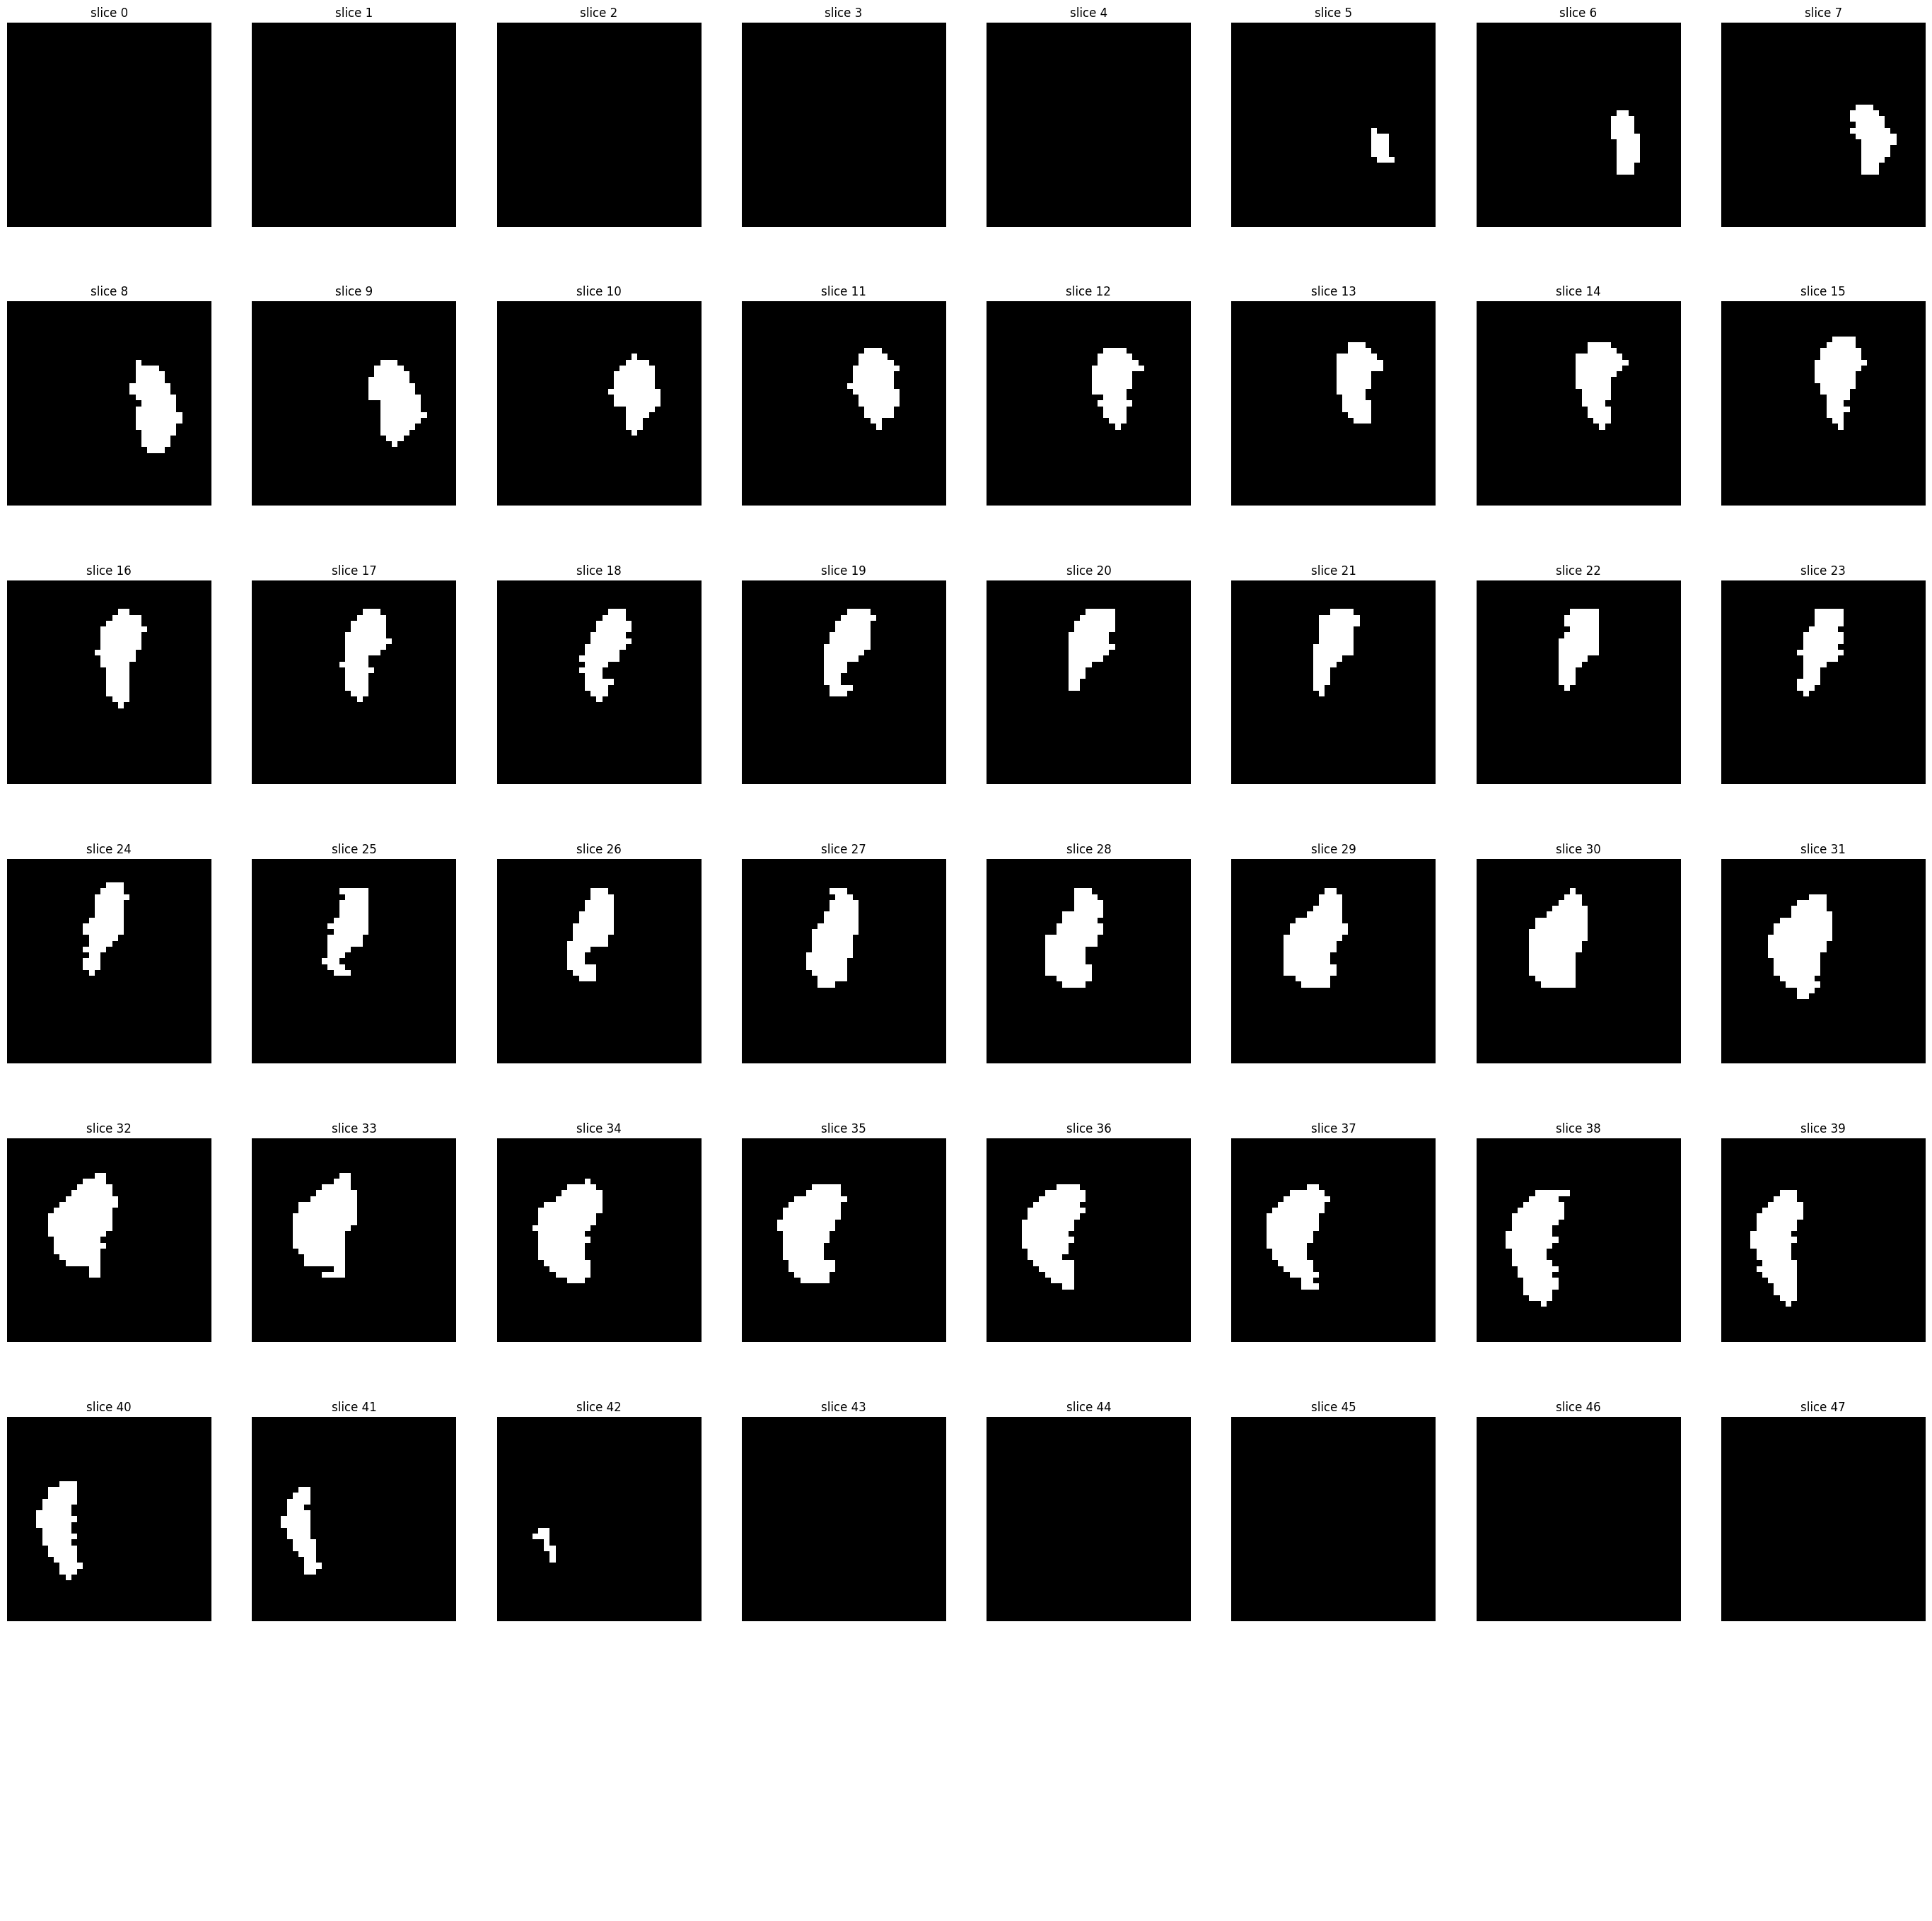

In [14]:
volume_slices(np.transpose(label_25,(1,0,2)),8,7)


IMAGE 25: AXIAL PLANE

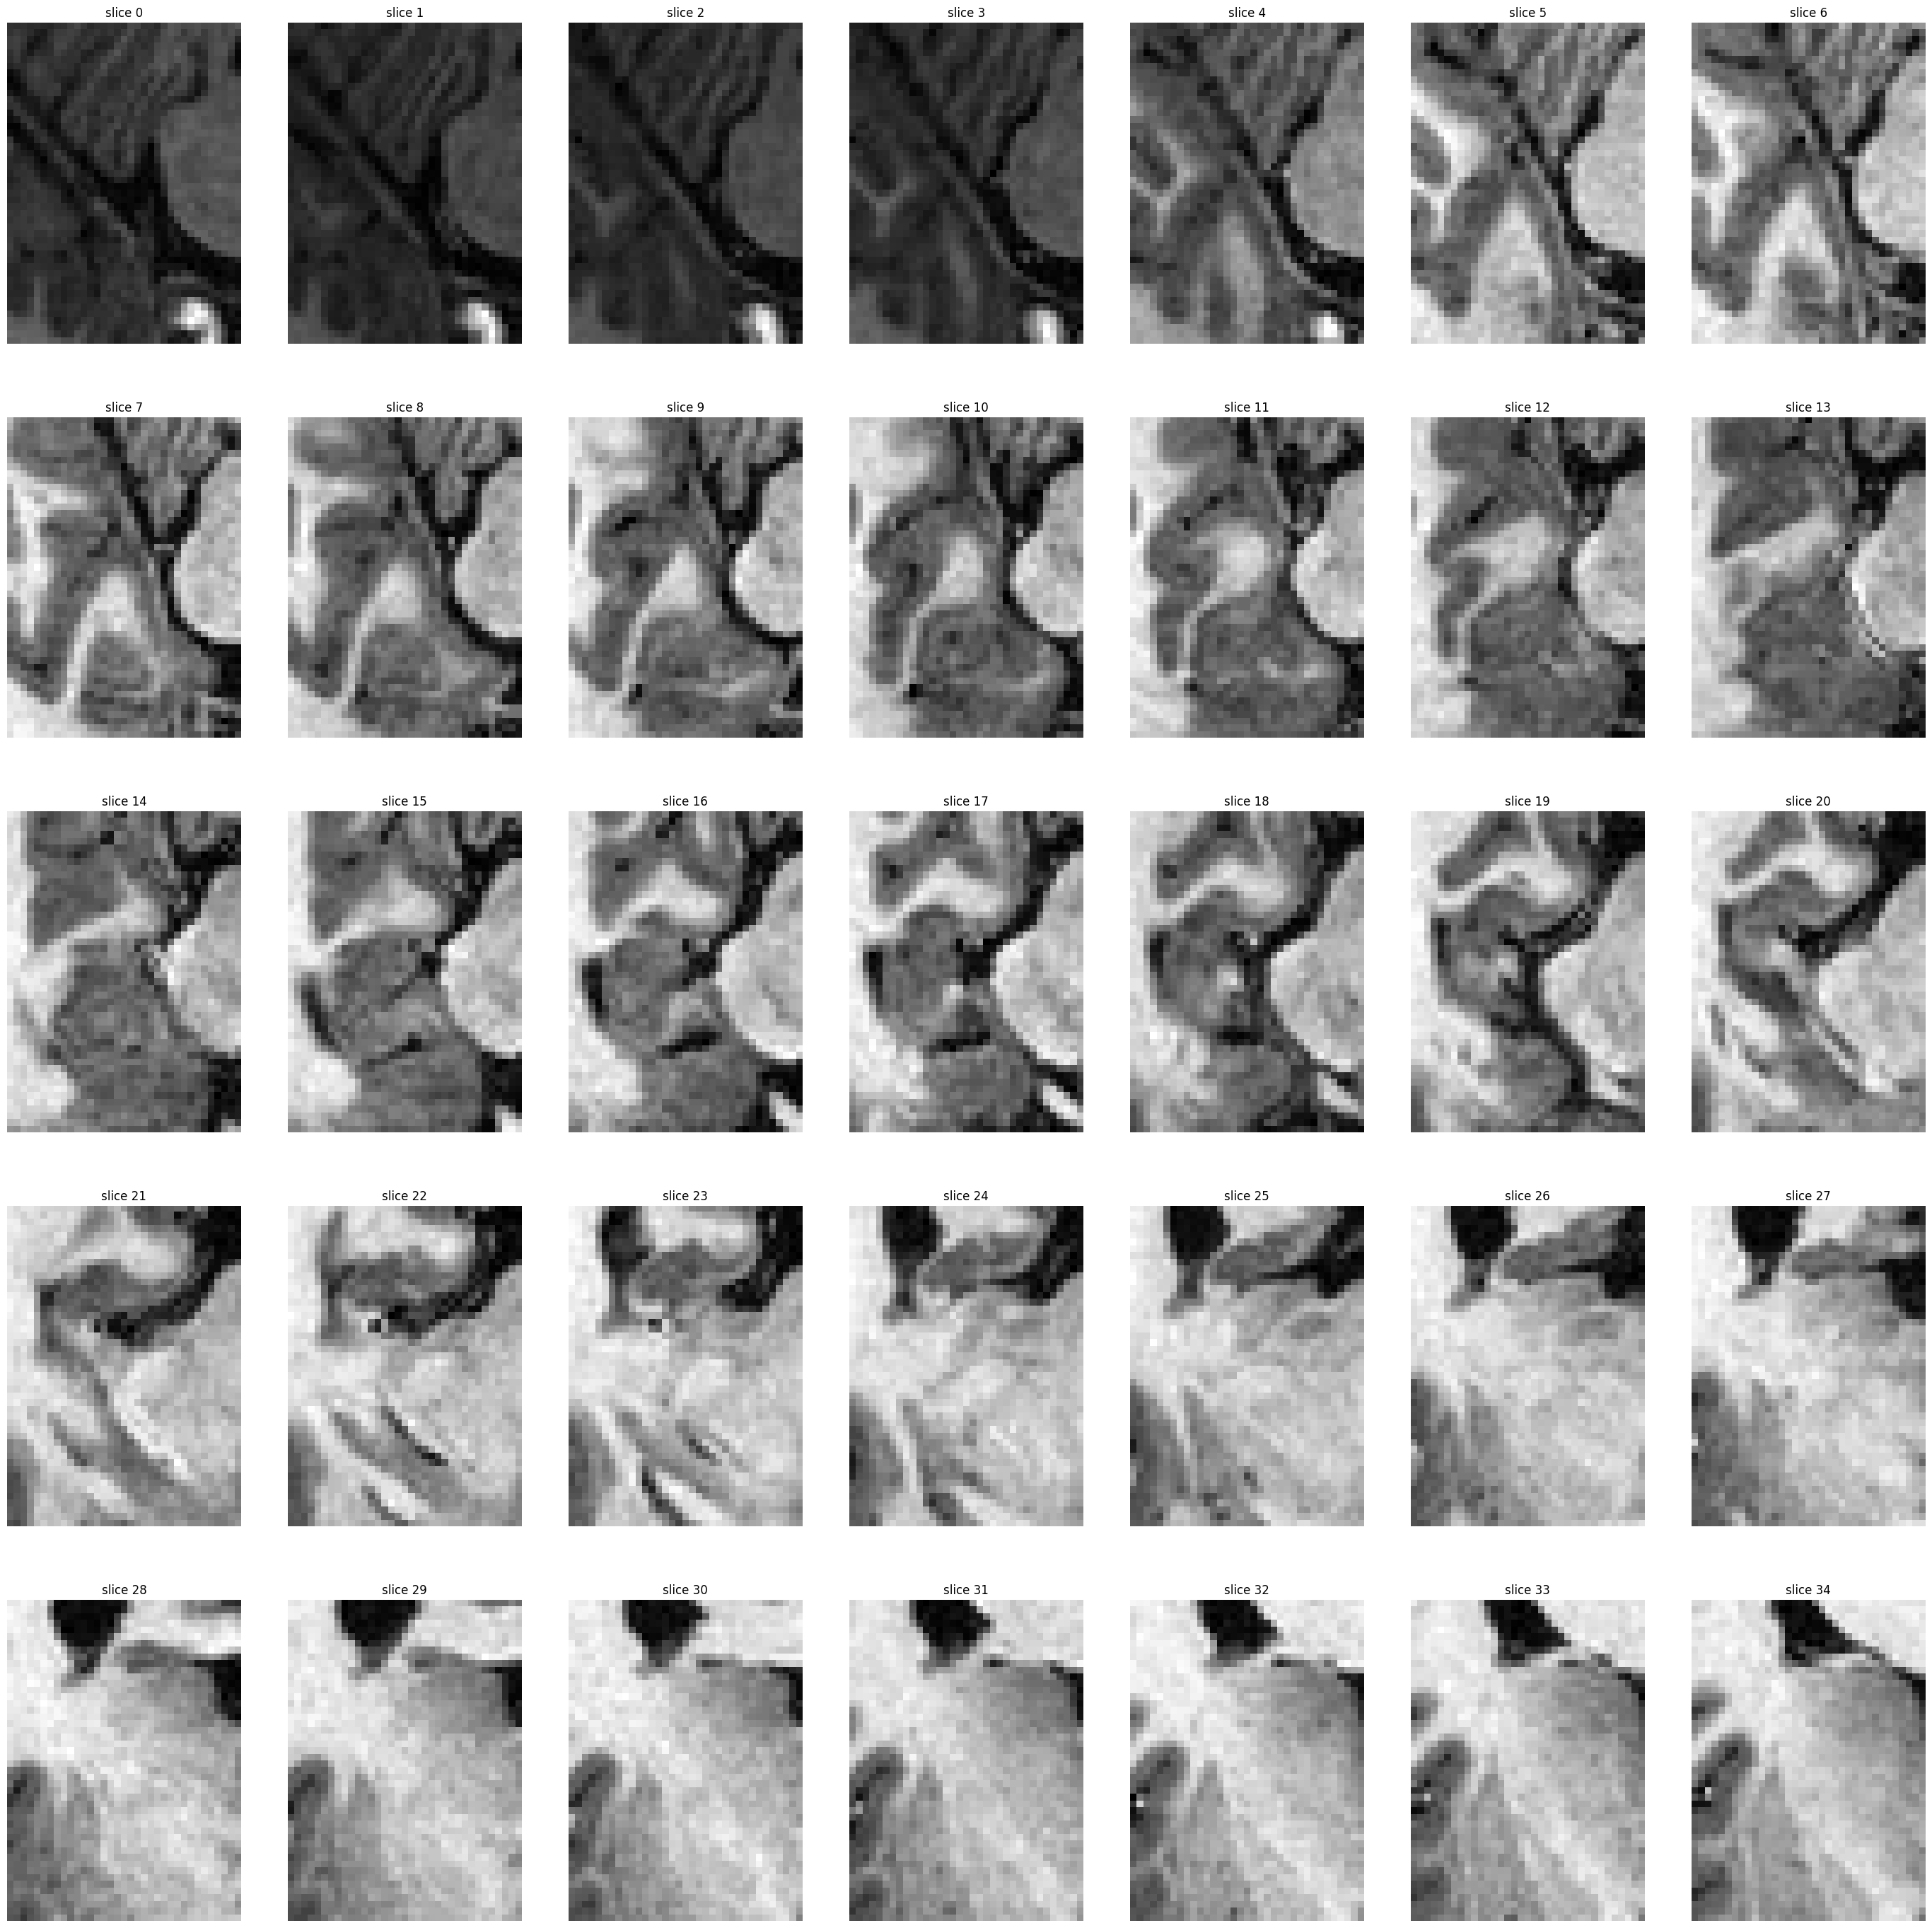

In [15]:
volume_slices(np.transpose(image_25,(2,1,0)),7,5)


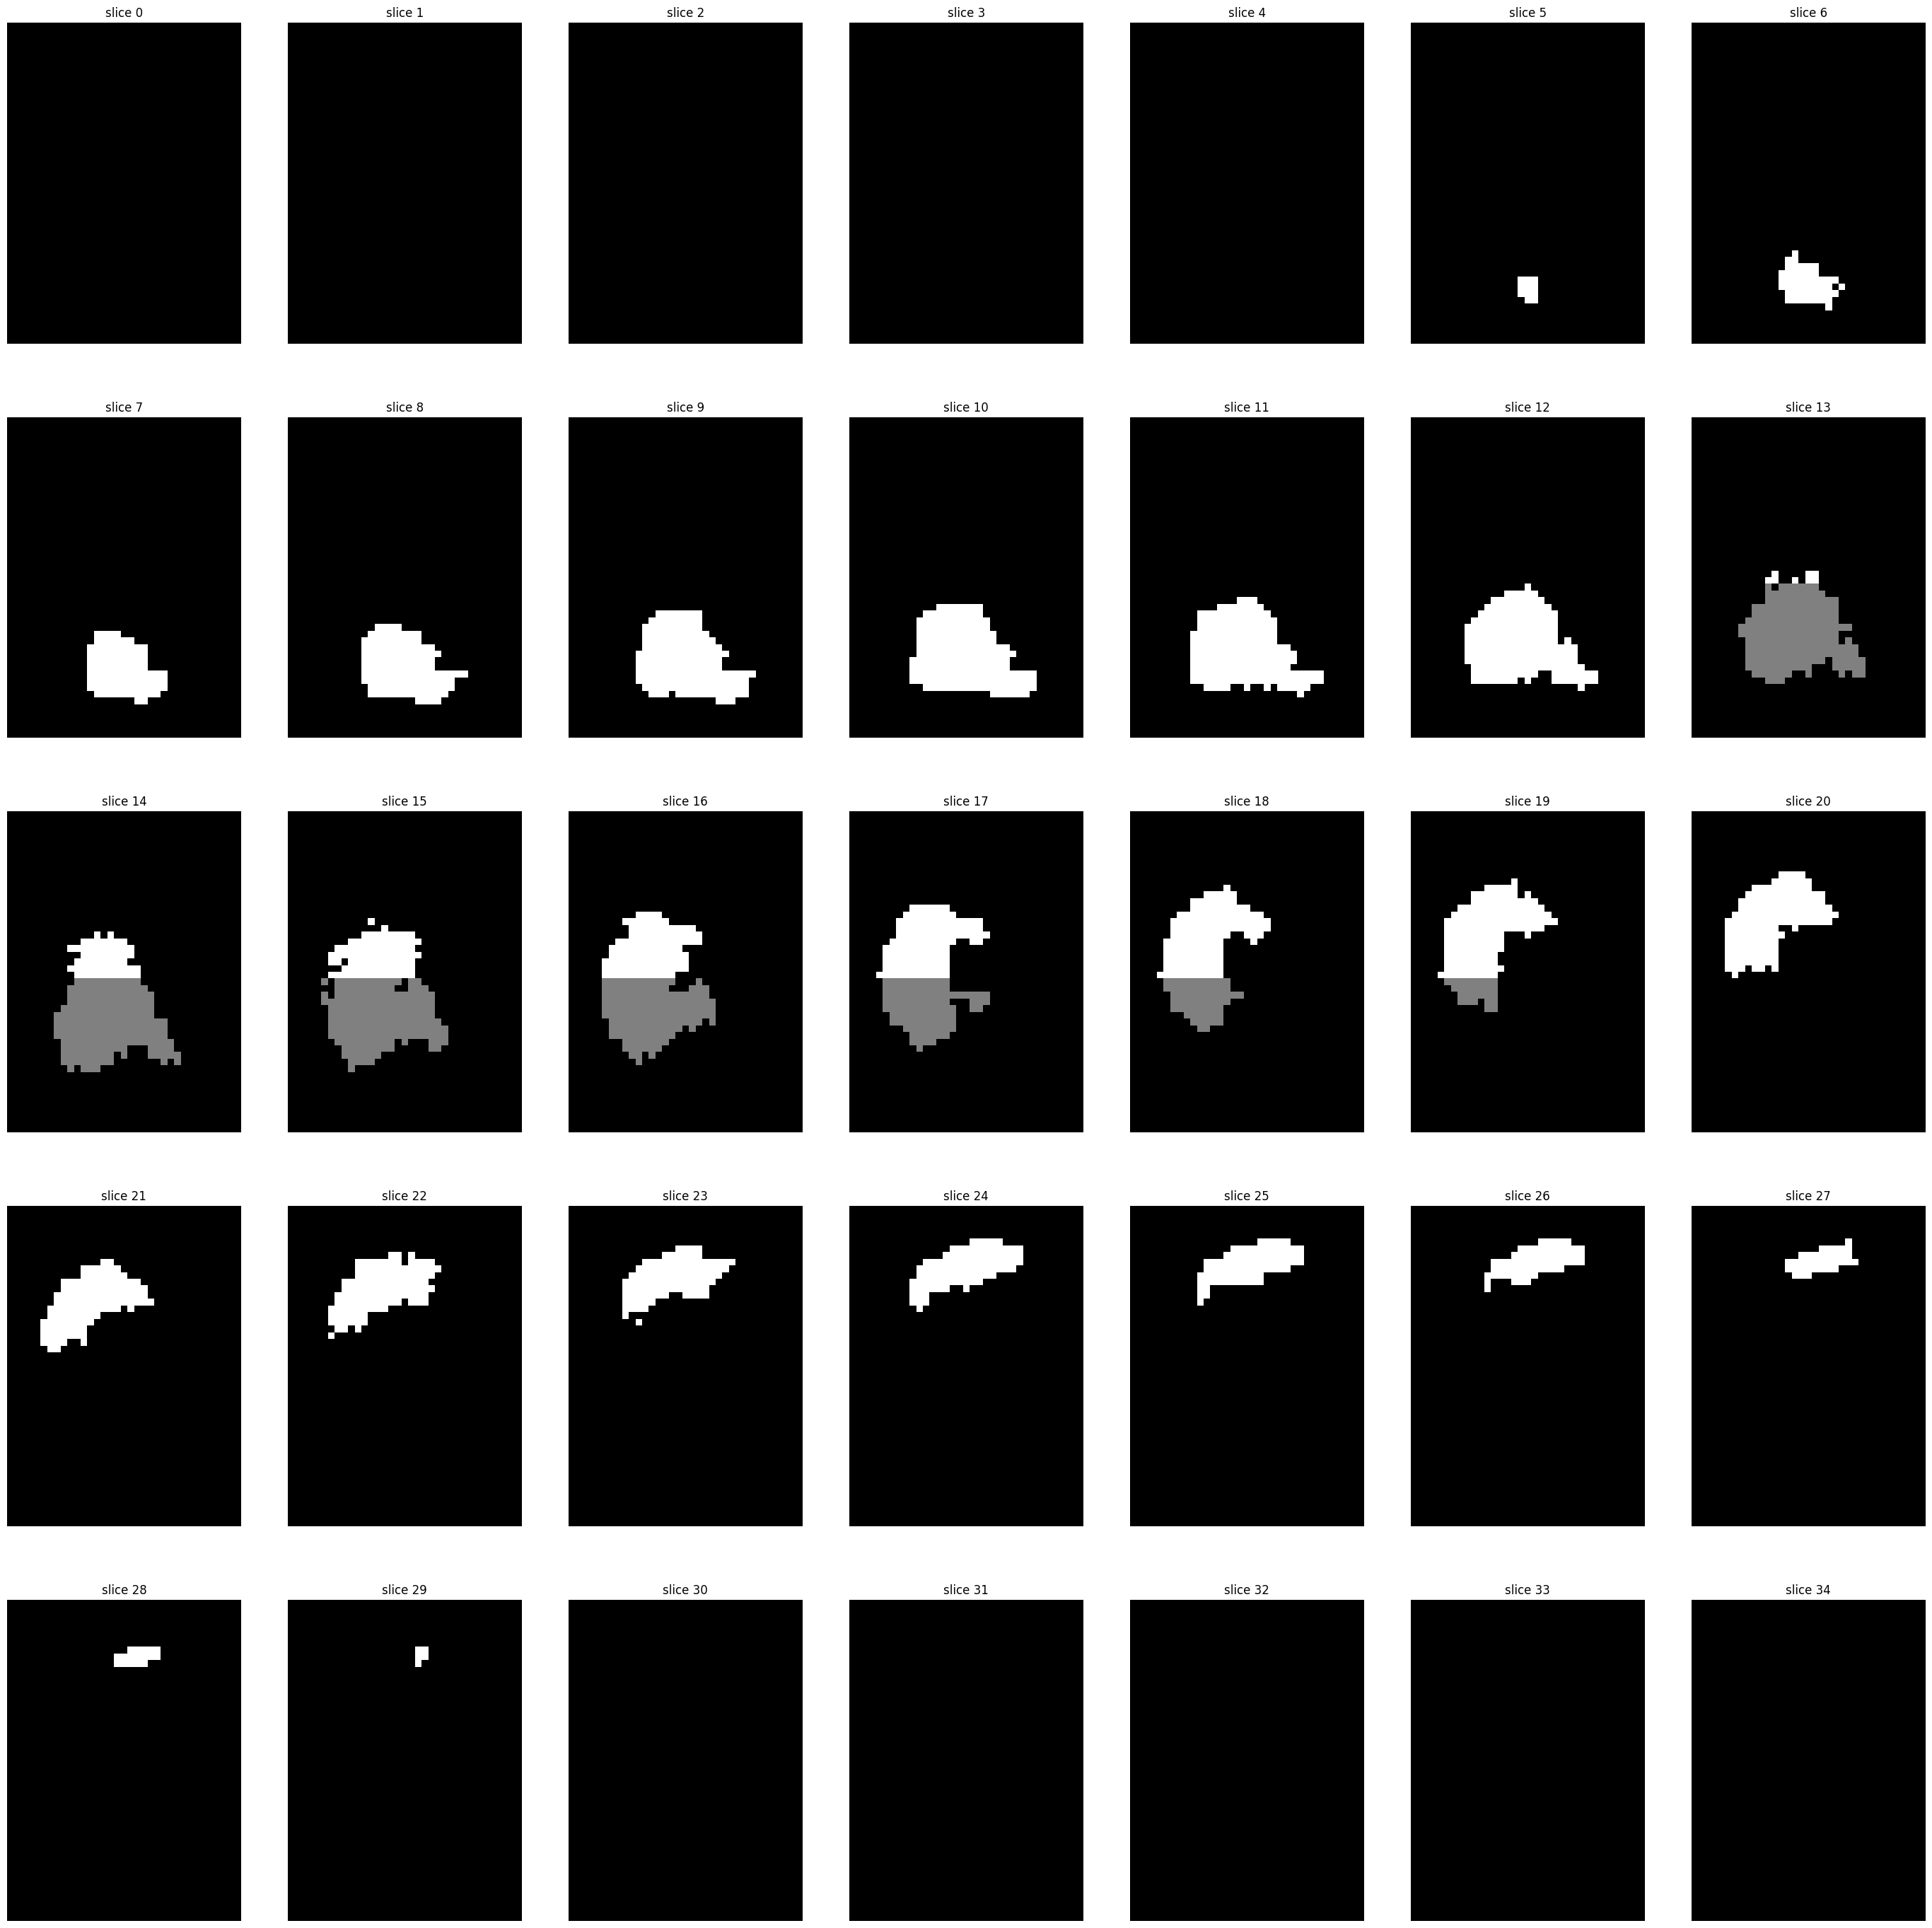

In [16]:
volume_slices(np.transpose(label_25,(2,1,0)),7,5)


In [17]:
img = nib.load(path+'\\unzipped_img\\hippocampus_001.nii')
img_hdr = img.header_class
print(img_hdr)

print(img)

<class 'nibabel.nifti1.Nifti1Header'>

<class 'nibabel.nifti1.Nifti1Image'>
data shape (35, 51, 35)
affine:
[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 35 51 35  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern

In [18]:
print(img.header.get_data_shape())
# First Dimension is the Sagittal Plane
# Second Dimension is the Coronal Plane
# Third Dimension is the Axial Plane

print(img.header['bitpix'])
#bitpix represents the bits per pixel

print(img.header.get_xyzt_units())
#units of measurements

(35, 51, 35)
8
('mm', 'sec')


In [19]:
print(img.header['xyzt_units'])
'''
The xyzt_units contains the dimension of the grid 
spacing in voxels.This field needs to be converted
 to binary (i.e., base 2) according to the endianness. 
 Then the first 3 bits are units for space, the next 3 
 are units for time. We have is 2 + 8, 
 indicating milimetres and seconds, 
 that in base 2 is: [0 1 0 1 0 0 0 0] = 10, 
 where [0 1 0 0 0 0 0 0] = 2 and [0 0 0 1 0 0 0 0] = 8.

'''

10


'\nThe xyzt_units contains the dimension of the grid \nspacing in voxels.This field needs to be converted\n to binary (i.e., base 2) according to the endianness. \n Then the first 3 bits are units for space, the next 3 \n are units for time. We have is 2 + 8, \n indicating milimetres and seconds, \n that in base 2 is: [0 1 0 1 0 0 0 0] = 10, \n where [0 1 0 0 0 0 0 0] = 2 and [0 0 0 1 0 0 0 0] = 8.\n\n'

In [20]:
mask_vol = np.sum((label > 0).astype(int))
print(mask_vol)
#mask volume is the sum of all masks

2948


In [21]:
def get_data(label_path):
    return nib.load(label_path).get_fdata()

def get_volume(mask):
    return np.sum((mask>0))

In [22]:
volumes = []
outliers = []
for label_ in labels:
    label_data = get_data(label_)
    label_vol = np.sum(label_data)
    if label_vol > 4700 or label_vol < 1900:
        outliers.append(label_)
    volumes.append(label_vol)

volumes.sort()
print('type:' , type(volumes[0]), '\nlength: ', len(volumes))
print(f'\nvolumes:\n{volumes}')
print(f'\noutliers:\n{outliers}')

type: <class 'numpy.float64'> 
length:  260

volumes:
[3464.0, 3503.0, 3601.0, 3677.0, 3699.0, 3703.0, 3715.0, 3728.0, 3795.0, 3801.0, 3818.0, 3831.0, 3839.0, 3845.0, 3848.0, 3859.0, 3888.0, 3895.0, 3897.0, 3903.0, 3916.0, 3959.0, 3963.0, 3982.0, 4006.0, 4010.0, 4021.0, 4049.0, 4065.0, 4072.0, 4078.0, 4094.0, 4095.0, 4101.0, 4104.0, 4114.0, 4115.0, 4122.0, 4127.0, 4128.0, 4131.0, 4132.0, 4152.0, 4156.0, 4169.0, 4181.0, 4184.0, 4189.0, 4193.0, 4194.0, 4201.0, 4204.0, 4212.0, 4255.0, 4265.0, 4267.0, 4275.0, 4295.0, 4299.0, 4334.0, 4349.0, 4355.0, 4385.0, 4409.0, 4409.0, 4427.0, 4429.0, 4457.0, 4472.0, 4477.0, 4488.0, 4490.0, 4491.0, 4502.0, 4502.0, 4538.0, 4562.0, 4564.0, 4571.0, 4572.0, 4583.0, 4587.0, 4601.0, 4610.0, 4610.0, 4618.0, 4640.0, 4651.0, 4652.0, 4666.0, 4668.0, 4671.0, 4681.0, 4697.0, 4719.0, 4733.0, 4741.0, 4746.0, 4748.0, 4750.0, 4754.0, 4756.0, 4758.0, 4763.0, 4771.0, 4774.0, 4782.0, 4790.0, 4796.0, 4812.0, 4815.0, 4821.0, 4824.0, 4827.0, 4828.0, 4830.0, 4837.0, 4849.0, 4

Text(0.5, 1.0, 'Hippocampal Volume Distribution')

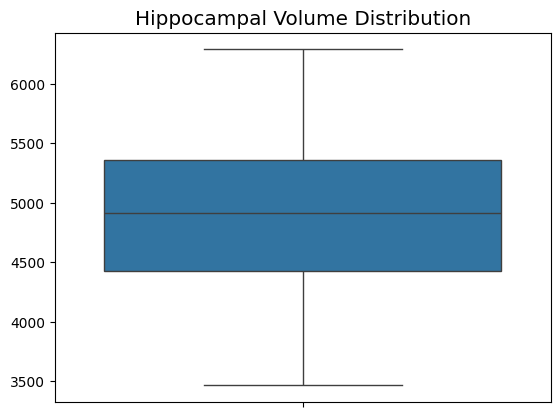

In [23]:
sns.boxplot(y=volumes)
plt.style.use('bmh')
plt.title('Hippocampal Volume Distribution')

IQR AND OUTLIERS

In [24]:
IQR = np.percentile(volumes, [75])-np.percentile(volumes,[25])

print(f'''
Quartiles with Outlier Boundaries:
max: {1.5*IQR+np.percentile(volumes, [75])}
75:  {np.percentile(volumes,[75])}
50:  {np.percentile(volumes,[50])} 
25:  {np.percentile(volumes,[25])} 
min: {np.percentile(volumes, [25])-1.5*IQR}
''')

print(f'Outliers: volumes < {np.percentile(volumes, [25])-1.5*IQR} OR {1.5*IQR+np.percentile(volumes, [75])} < volumes')


Quartiles with Outlier Boundaries:
max: [6757.5]
75:  [5356.5]
50:  [4913.5] 
25:  [4422.5] 
min: [3021.5]

Outliers: volumes < [3021.5] OR [6757.5] < volumes


(array([ 2.,  0.,  1.,  1.,  4.,  2.,  6.,  4.,  3.,  4.,  4., 11.,  8.,
         3.,  6.,  3.,  3.,  5.,  5.,  7.,  5.,  7., 10.,  7., 13., 15.,
        10., 10., 11.,  5.,  5.,  5.,  9.,  2., 12.,  6.,  7.,  4.,  9.,
         4.,  6.,  3.,  3.,  0.,  2.,  2.,  2.,  1.,  2.,  1.]),
 array([3464. , 3520.5, 3577. , 3633.5, 3690. , 3746.5, 3803. , 3859.5,
        3916. , 3972.5, 4029. , 4085.5, 4142. , 4198.5, 4255. , 4311.5,
        4368. , 4424.5, 4481. , 4537.5, 4594. , 4650.5, 4707. , 4763.5,
        4820. , 4876.5, 4933. , 4989.5, 5046. , 5102.5, 5159. , 5215.5,
        5272. , 5328.5, 5385. , 5441.5, 5498. , 5554.5, 5611. , 5667.5,
        5724. , 5780.5, 5837. , 5893.5, 5950. , 6006.5, 6063. , 6119.5,
        6176. , 6232.5, 6289. ]),
 <BarContainer object of 50 artists>)

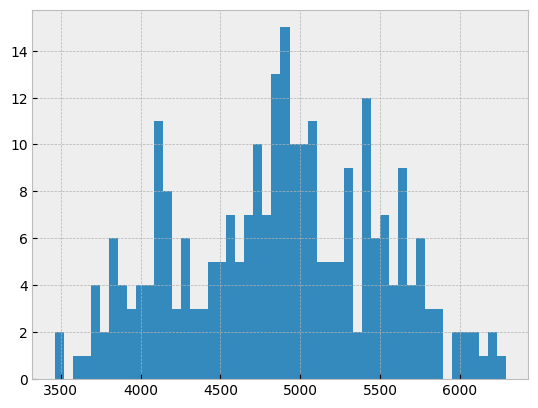

In [25]:
plt.hist(volumes, bins = 50)

FINDING SHAPER OUTLIERS

In [39]:
lg_labels = []
lg_images = []
for image_ in images:
    image_data = get_data(image_)
    print(f"Image: {image_}, Shape: {image_data.shape}")  
    if image_data.shape[0] > 41:
        lg_images.append(image_)

for label in labels:
    label_data = get_data(label)
    print(f"Label: {label}, Shape: {label_data.shape}")  
    if label_data.shape[0] > 41:
        lg_labels.append(label)

print("Filtered Images:", lg_images)
print("Filtered Labels:", lg_labels)


Image: C:\Users\aryan\OneDrive\Desktop\Hypocampal Volume Quantification of Alzheimers\unzipped_img\hippocampus_001.nii, Shape: (35, 51, 35)
Image: C:\Users\aryan\OneDrive\Desktop\Hypocampal Volume Quantification of Alzheimers\unzipped_img\hippocampus_003.nii, Shape: (34, 52, 35)
Image: C:\Users\aryan\OneDrive\Desktop\Hypocampal Volume Quantification of Alzheimers\unzipped_img\hippocampus_004.nii, Shape: (36, 52, 38)
Image: C:\Users\aryan\OneDrive\Desktop\Hypocampal Volume Quantification of Alzheimers\unzipped_img\hippocampus_006.nii, Shape: (35, 52, 34)
Image: C:\Users\aryan\OneDrive\Desktop\Hypocampal Volume Quantification of Alzheimers\unzipped_img\hippocampus_007.nii, Shape: (34, 47, 40)
Image: C:\Users\aryan\OneDrive\Desktop\Hypocampal Volume Quantification of Alzheimers\unzipped_img\hippocampus_008.nii, Shape: (36, 48, 40)
Image: C:\Users\aryan\OneDrive\Desktop\Hypocampal Volume Quantification of Alzheimers\unzipped_img\hippocampus_011.nii, Shape: (36, 50, 31)
Image: C:\Users\arya

In [59]:
image_15 = nib.load(path+'\\unzipped_img\\hippocampus_015.nii').get_fdata()
label_15 = nib.load(path+'\\unzipped_labels\\hippocampus_015.nii').get_fdata()

image_125 = nib.load(path+'\\unzipped_img\\hippocampus_125.nii').get_fdata()
label_125 = nib.load(path+'\\unzipped_labels\\hippocampus_125.nii').get_fdata()

image_15.shape, label_15.shape, image_125.shape, label_125.shape

((42, 51, 28), (42, 51, 28), (43, 42, 39), (43, 42, 39))

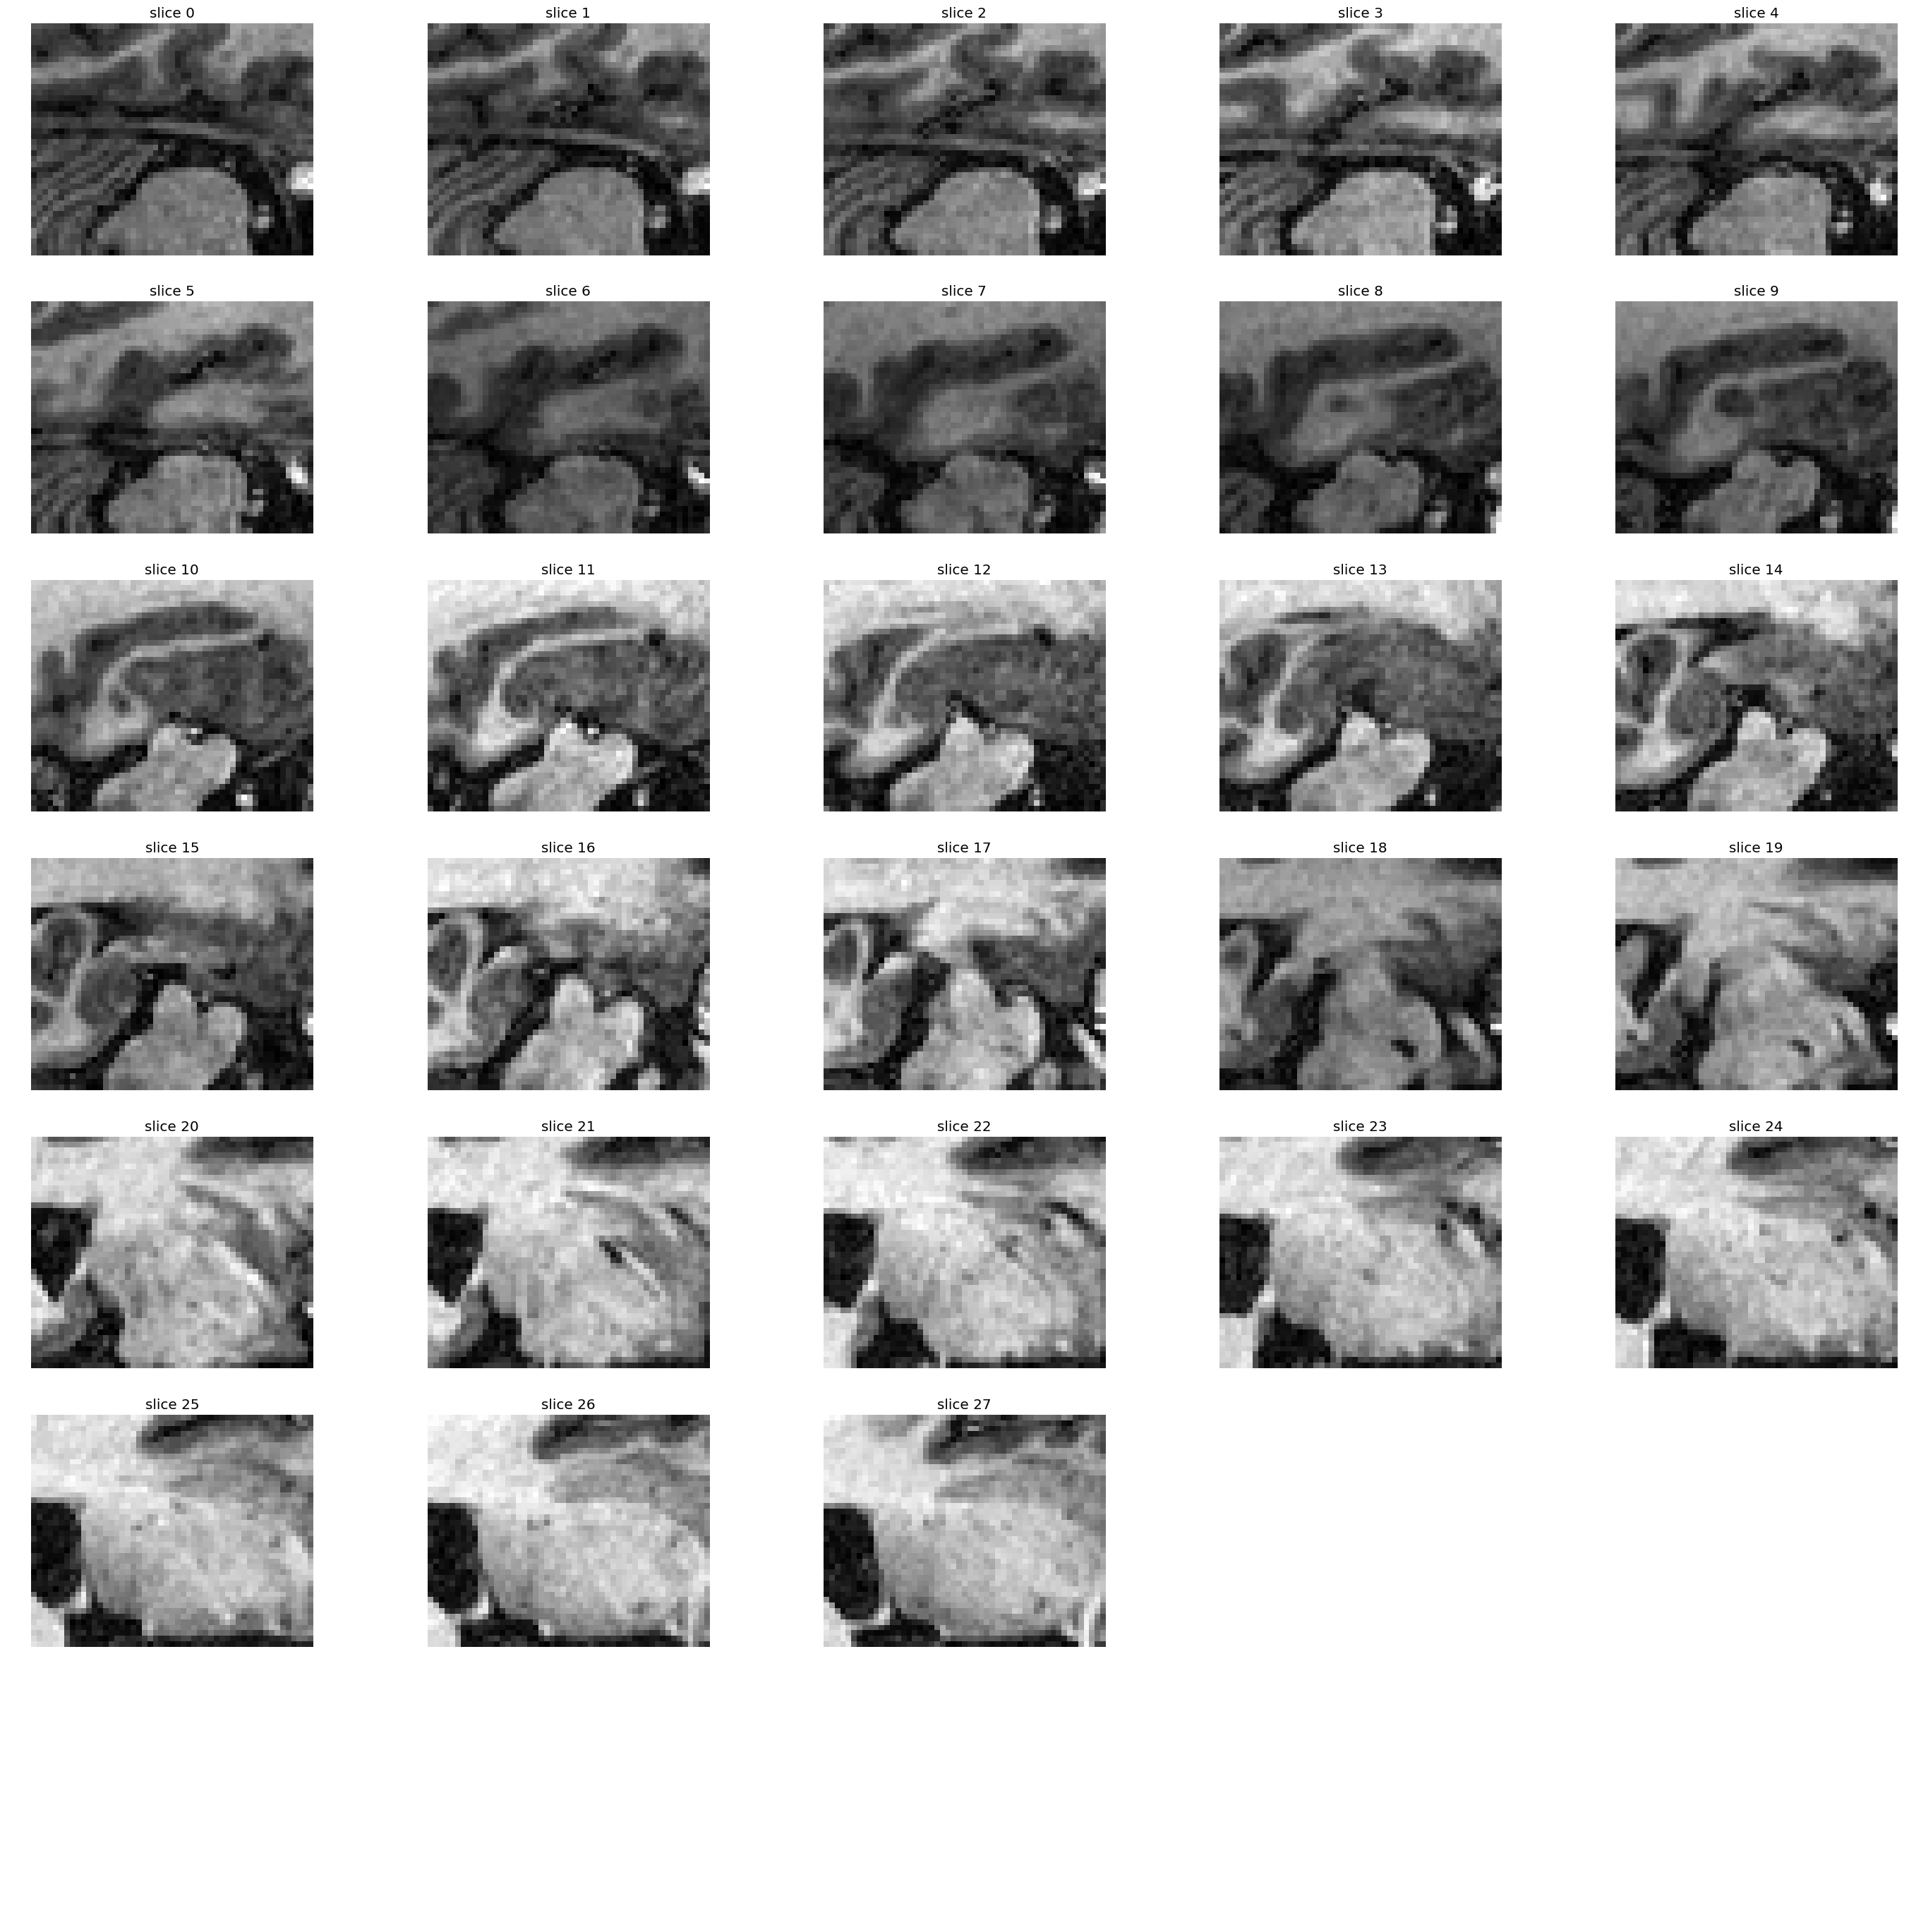

In [60]:
volume_slices(np.transpose(image_15,(2,0,1)),5,7)


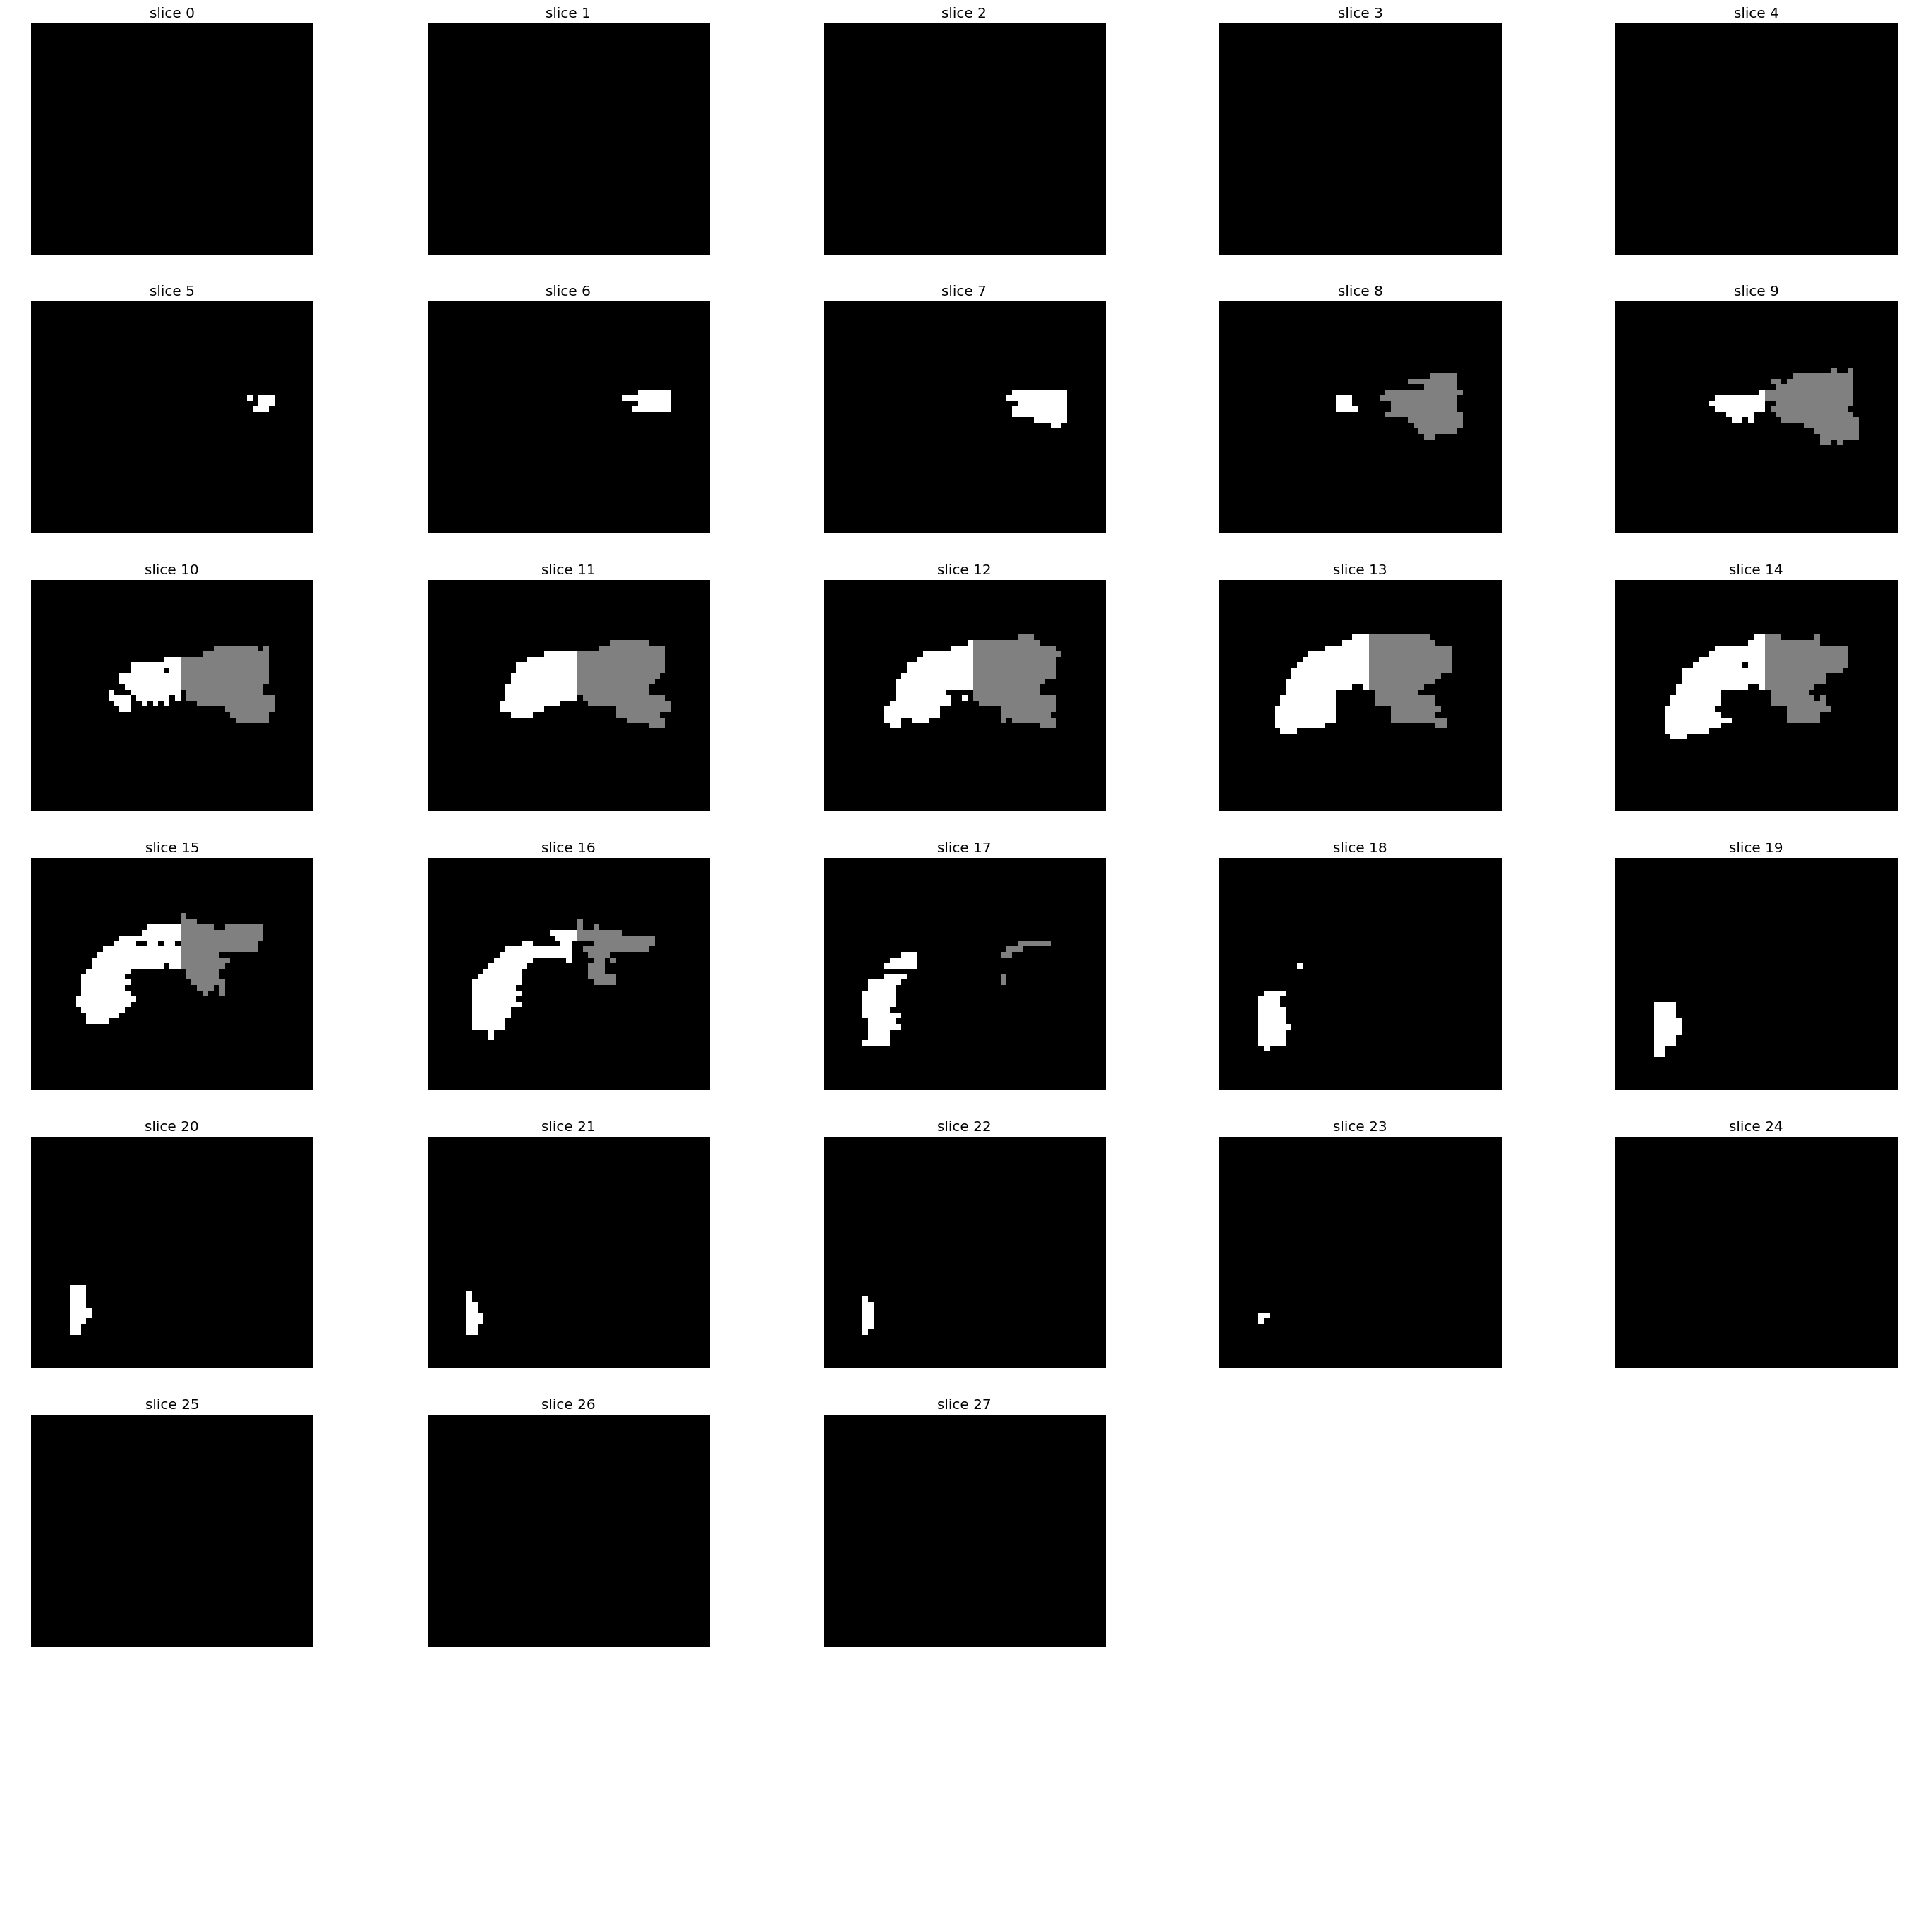

In [61]:
volume_slices(np.transpose(label_15,(2,0,1)),5,7)


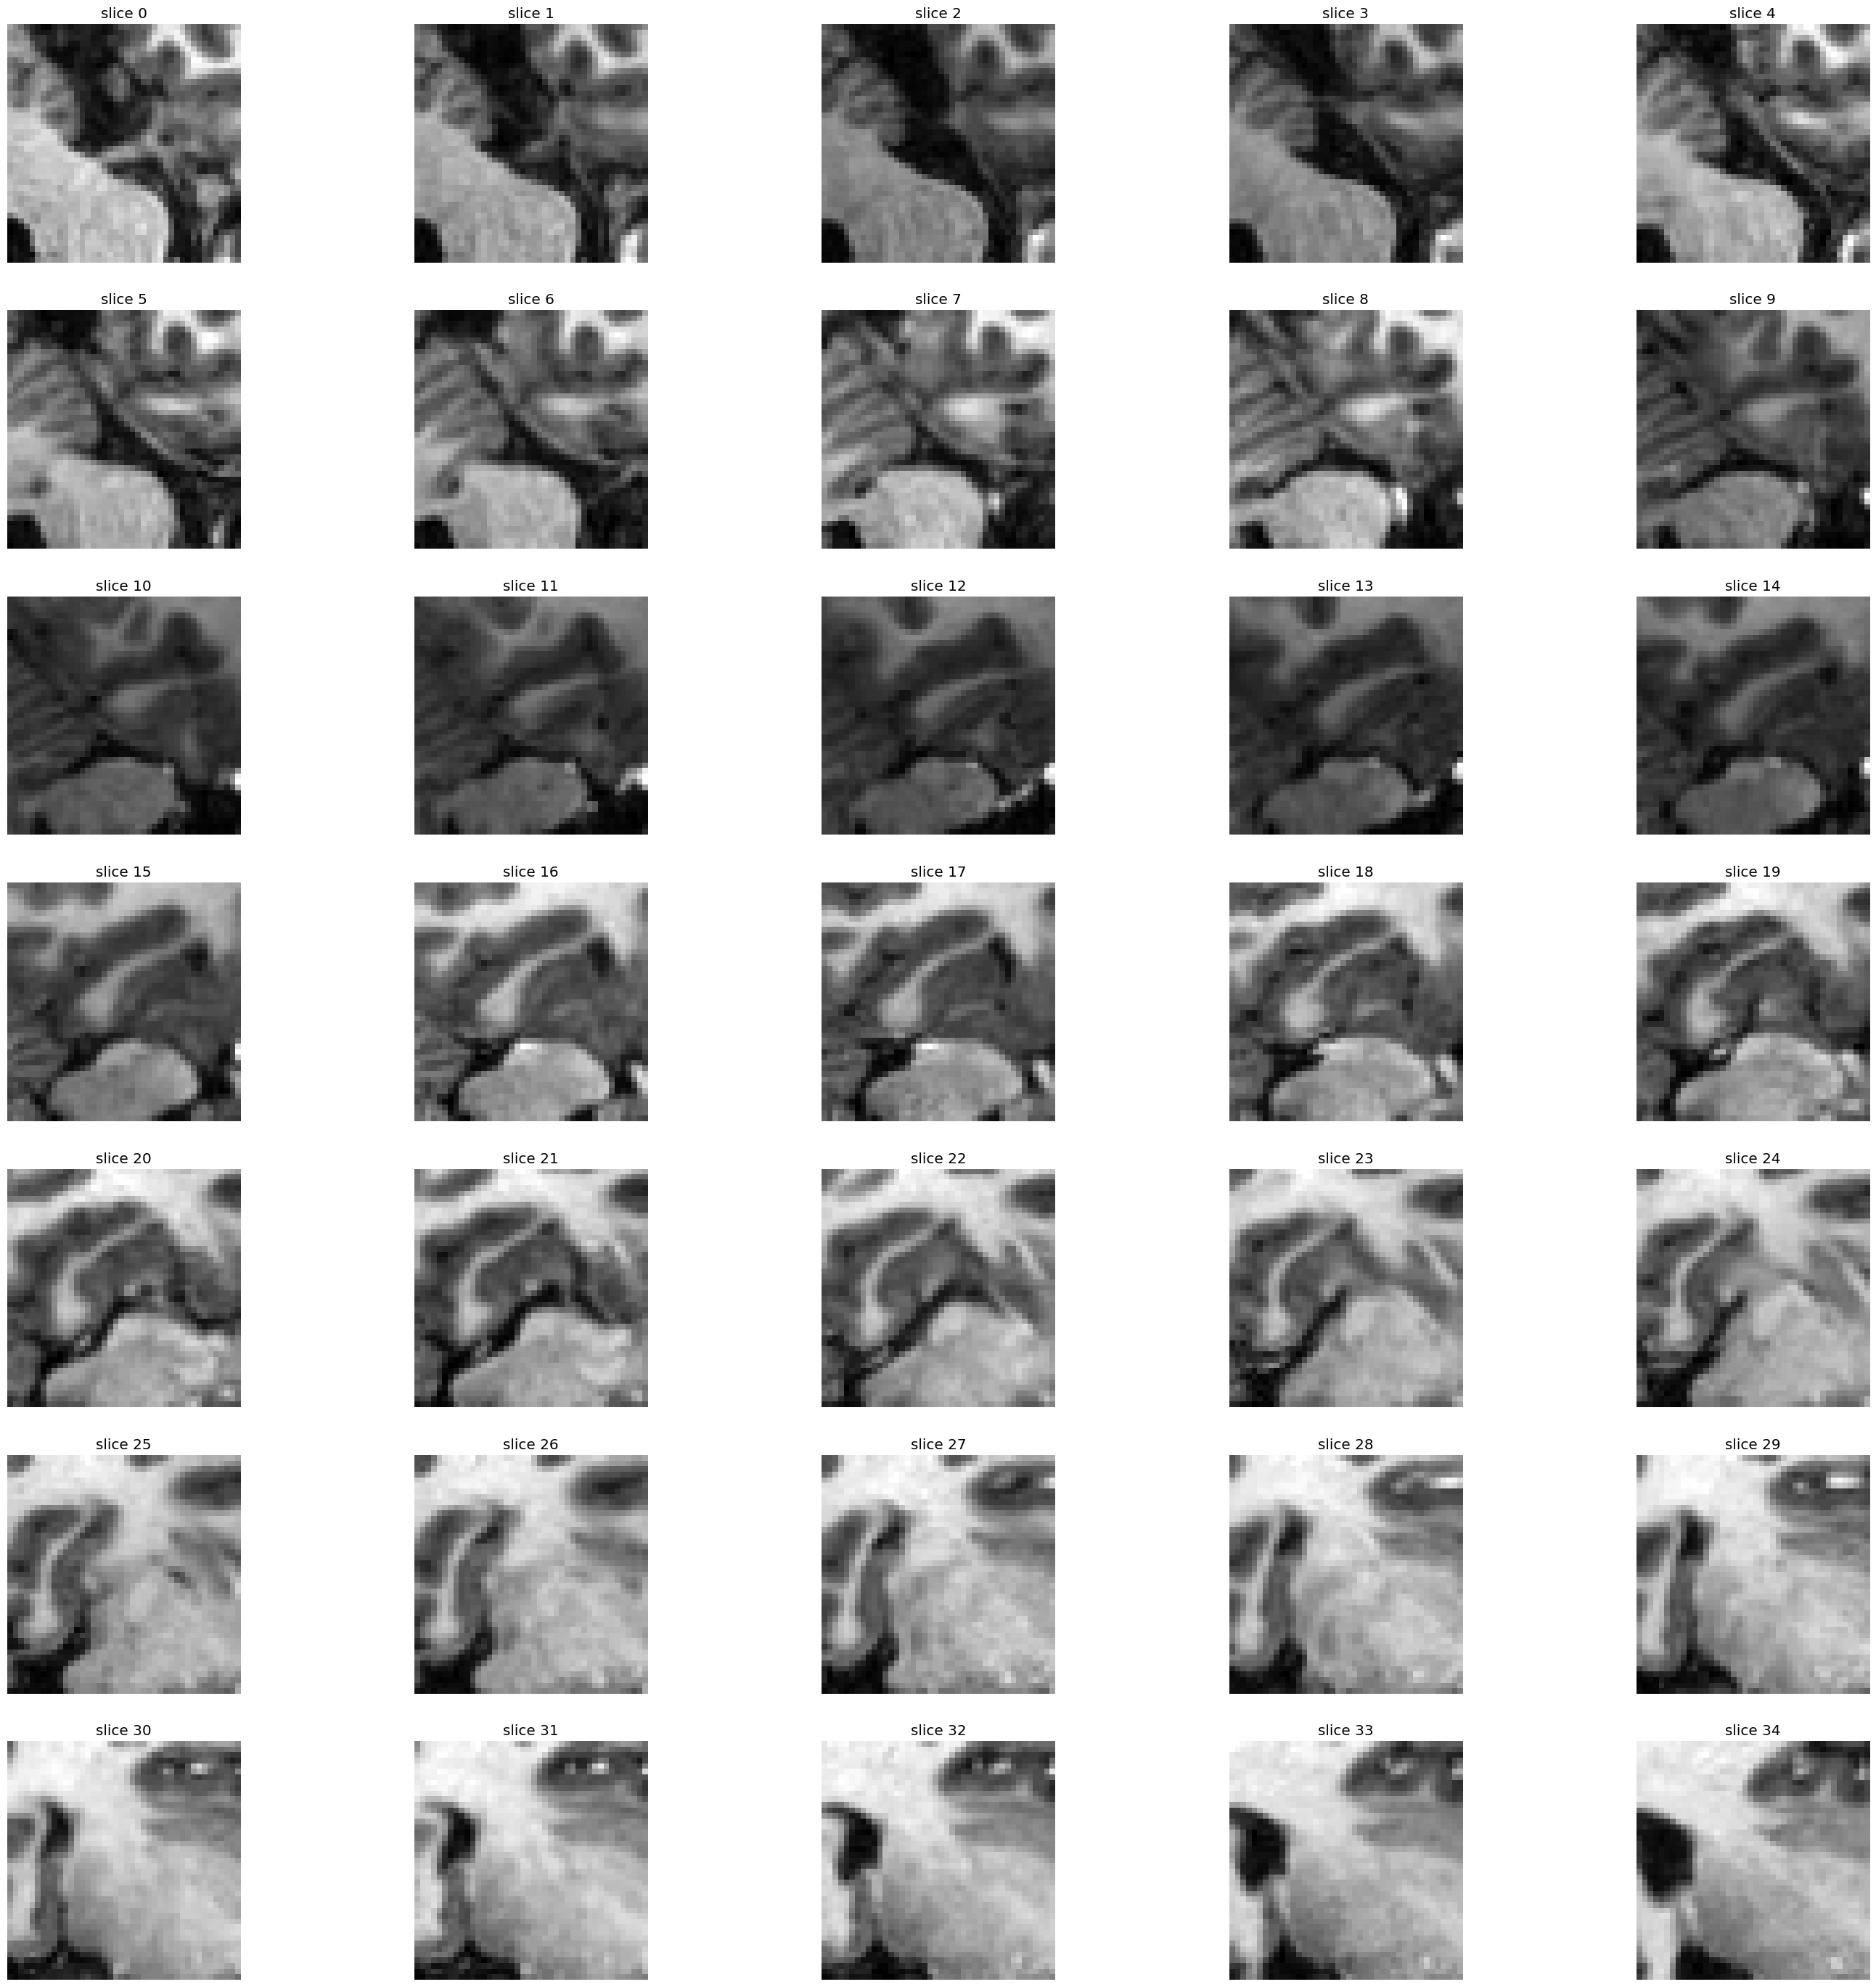

In [62]:
volume_slices(np.transpose(image_125,(2,0,1)),5,7)


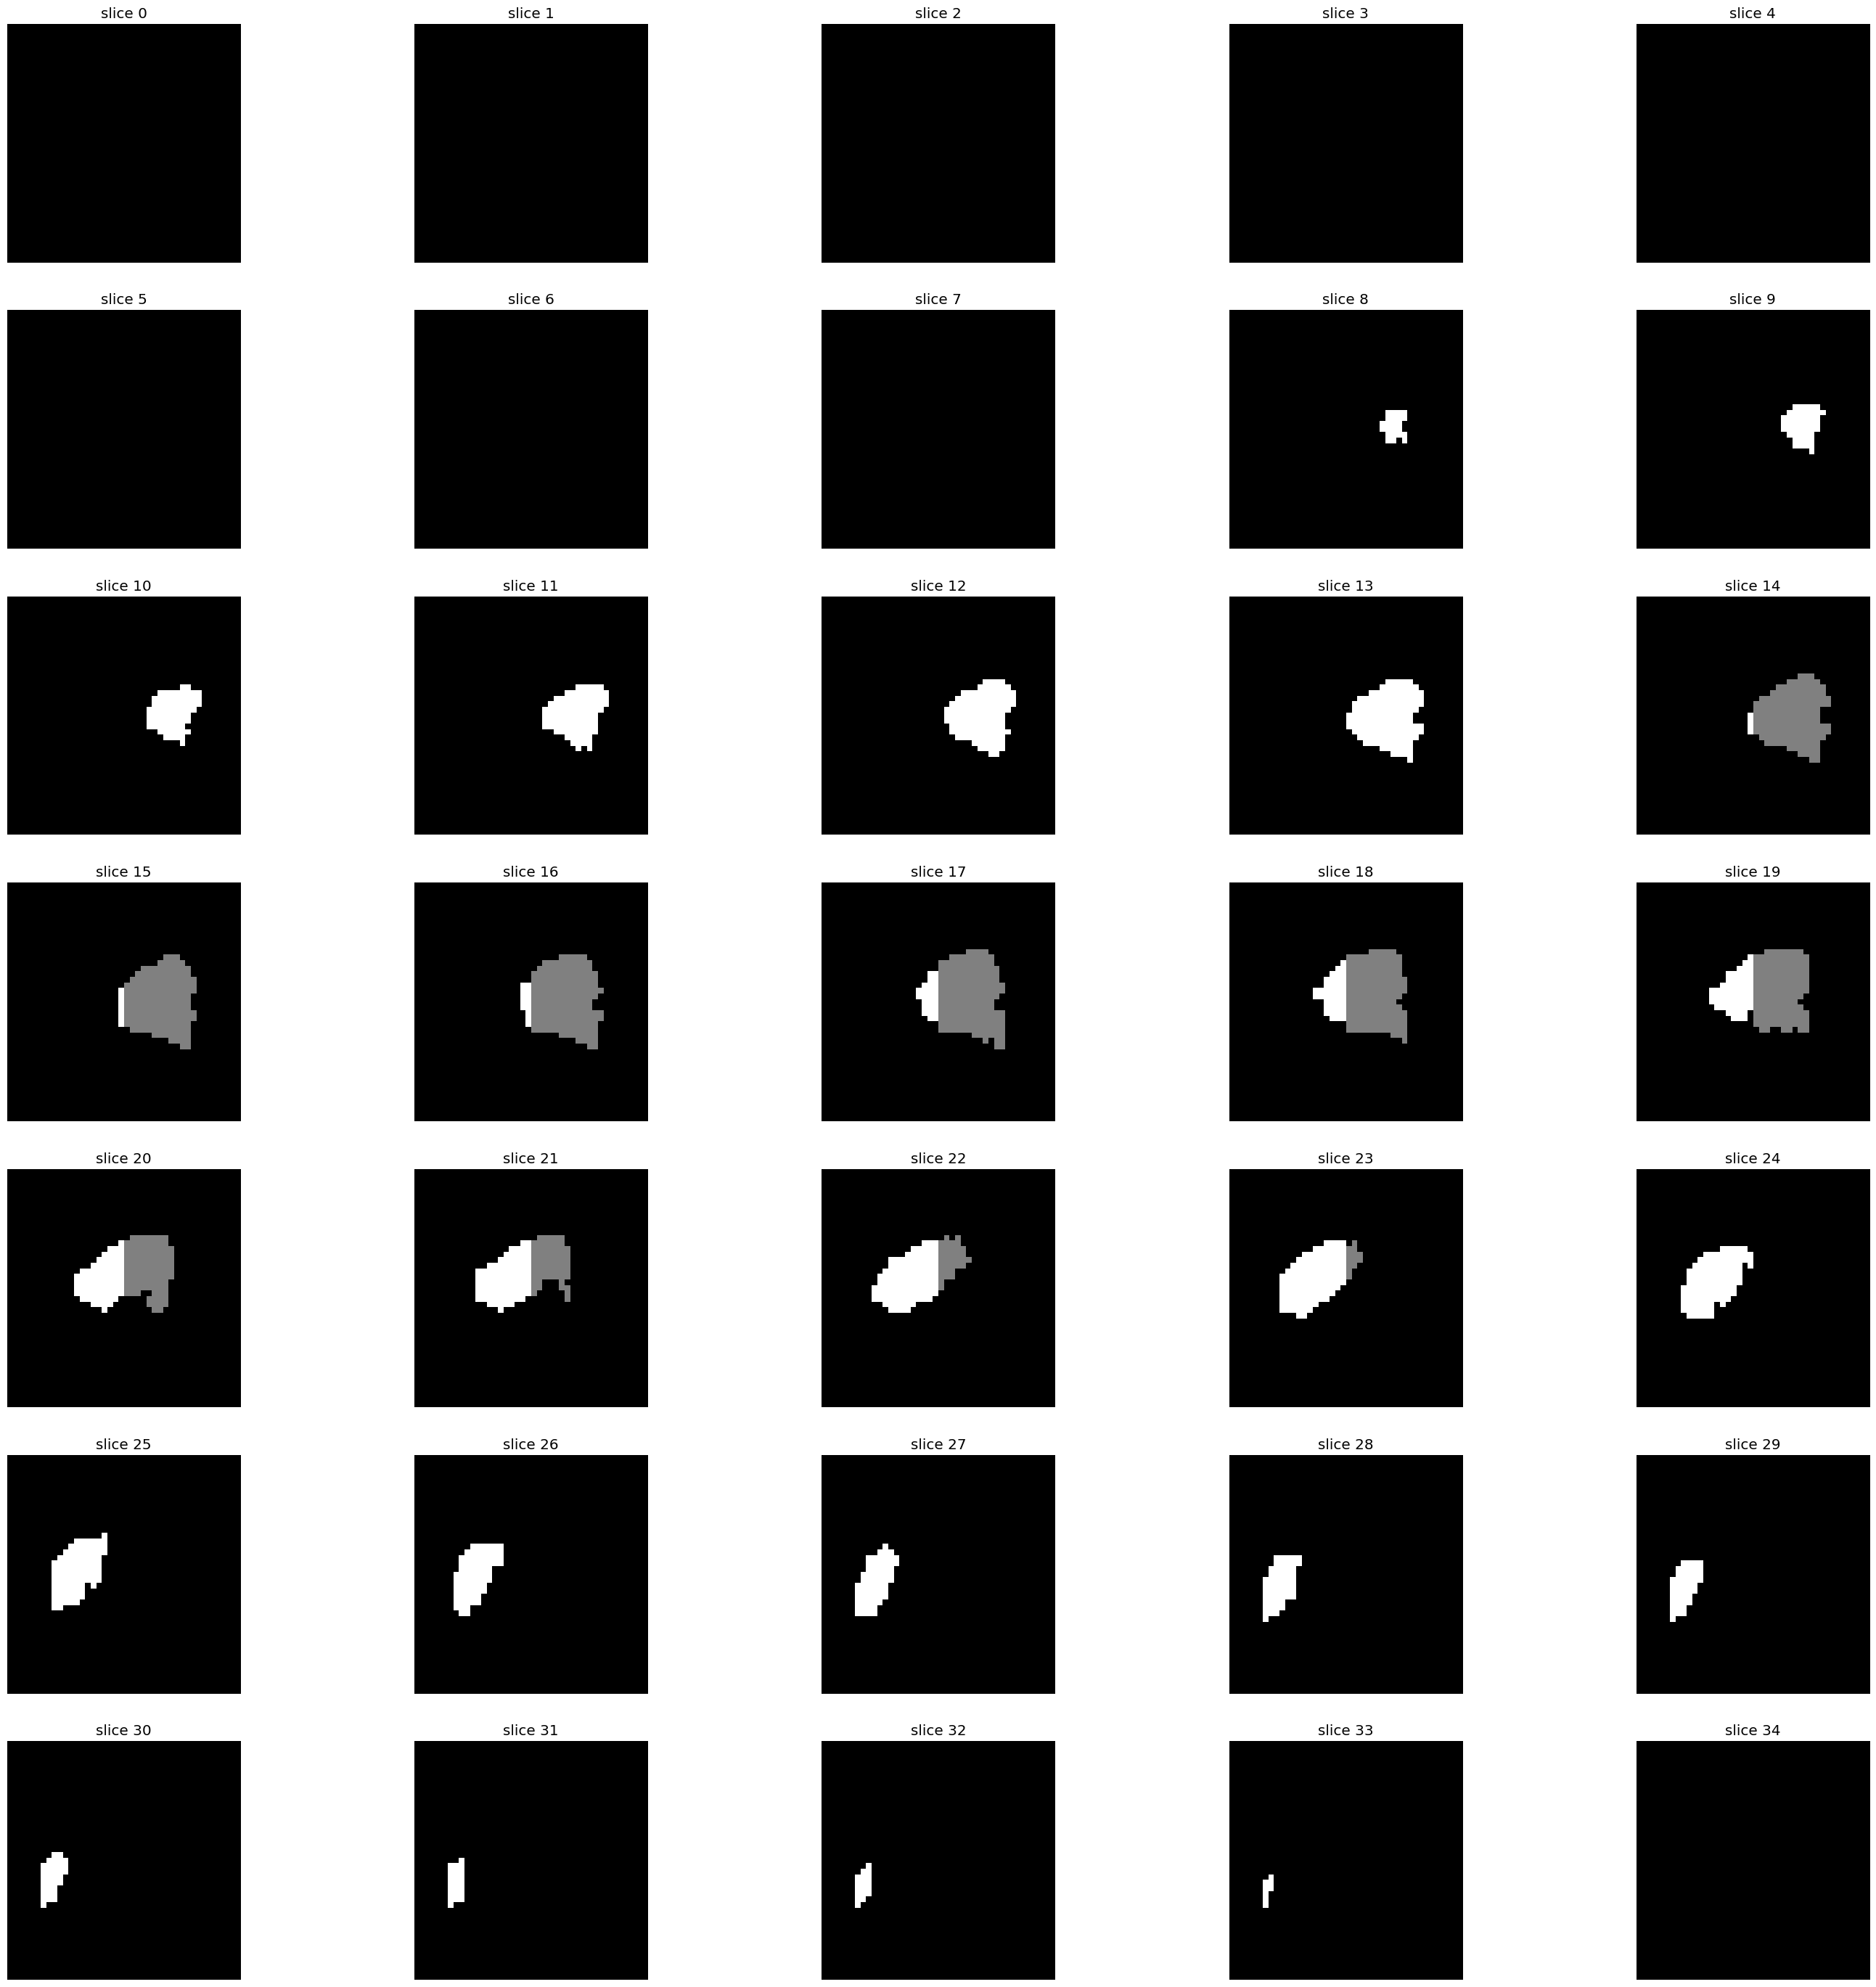

In [64]:
volume_slices(np.transpose(label_125,(2,0,1)),5,7)

In [75]:
def match_files(path):
    item_number = path[-7:-4]
    return item_number

match_files('C:\\Users\\aryan\\OneDrive\\Desktop\\Hypocampal Volume Quantification of Alzheimers\\unzipped_labels\\hippocampus_001.nii') == '001'

True

In [83]:
img_numbers = [match_files(image) for image in images]
labl_numbers = [match_files(label) for label in labels]
print(f'len image_numbers: {len(img_numbers)}')
print(f'len label_numbers: {len(labl_numbers)}')

#checking for duplicates
img_number_set = set(img_numbers)
label_number_set = set(labl_numbers)
print(f'unique image numbers: {len(img_number_set)}')
print(f'unique label numbers: {len(label_number_set)}')
print(f'mismatched items (to remove): {list(set(img_numbers) - set(labl_numbers))}')

len image_numbers: 260
len label_numbers: 260
unique image numbers: 260
unique label numbers: 260
mismatched items (to remove): []


ON CHECKING WE REALIZED THAT NOTHING IS DUPLICATED AND THERE IS NO MISMATCH IN DATA ALTHOUGH WE STILL HAVE 2 Images which are not falling in our desired range and hence we can remove it. Although it is not required. 